<a href="https://colab.research.google.com/github/jsblandon/ShapeClassification/blob/master/mainReliefFCKA_MPEG7DB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bag of Contour Fragments Feature Selection using ReliefF and Centered Kernel Alignment - MPEG-7 DB**

**Authors:** 


*   Juan Sebastian Blandon Luengas, Automatic Researh Group, Universidad Tecnologica de Pereira, jsblandon@utp.edu.co
*   Andres Marino Alvarez Meza, Control and Digital Signal Processing Group, Universidad Nacional de Colombia - Sede Manizales, amalvarezme@unal.edu.co


**Recommendation before starting**




Preventing Google Colab disconection:



1.   Press key combination $\texttt{Ctrl+Shift+i}$. Then, in the emerging window press $\texttt{Console}$

2.   Once the $\texttt{Console}$ has open, introduce the next code:


  ```
  function ClickConnect(){
  console.log("Working"); 
  document.querySelector("colab-toolbar-button#connect").click() 
  }
  setInterval(ClickConnect,60000)
  ```



3.   Then, press $\texttt{Enter}$. If the process is correct the message $\texttt{working}$ appears in console, but if it is incorrect introduce the next code:



  ```
  function ClickConnect(){
  console.log("Working"); 
  document.querySelector("colab-toolbar-button").click() 
  }setInterval(ClickConnect,60000)
  ```

**Loading auxiliary functions and database from a .zip file**





We load the needed complementary functions to run this code. Specially, we used a version of Centered Kernel Alignment algorithm implemented in python, which is based on the codes from:

*Alvarez-Meza AM, Orozco-Gutierrez A, Castellanos-Dominguez G. Kernel-based relevance analysis with enhanced interpretability for detection of brain activity patterns. Frontiers in neuroscience. 2017 Oct 6;11:550.*

In [ ]:
# # This code cell loads the Auxiliary Functions:
# FILEID = "10bDUcXkDixgtZziiYJQGXL1YX6JpjkoS"
# !wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O codigos.zip && rm -rf /tmp/cookies.txt
# !unzip codigos.zip
# !dir

--2020-07-21 05:44:56--  https://docs.google.com/uc?export=download&confirm=&id=10bDUcXkDixgtZziiYJQGXL1YX6JpjkoS
Resolving docs.google.com (docs.google.com)... 74.125.195.101, 74.125.195.113, 74.125.195.139, ...
Connecting to docs.google.com (docs.google.com)|74.125.195.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0g-3o-docs.googleusercontent.com/docs/securesc/96evm2cjcalhcmst85dtpe9bm65i5mcp/aaj54ceotarncbrkj0qi8el222nvehio/1595310225000/16942134963990678590/02749906069044202977Z/10bDUcXkDixgtZziiYJQGXL1YX6JpjkoS?e=download [following]
--2020-07-21 05:44:57--  https://doc-0g-3o-docs.googleusercontent.com/docs/securesc/96evm2cjcalhcmst85dtpe9bm65i5mcp/aaj54ceotarncbrkj0qi8el222nvehio/1595310225000/16942134963990678590/02749906069044202977Z/10bDUcXkDixgtZziiYJQGXL1YX6JpjkoS?e=download
Resolving doc-0g-3o-docs.googleusercontent.com (doc-0g-3o-docs.googleusercontent.com)... 173.194.203.132, 2607:f8b0:400e:c05::84
Connecting to

The next cell load the database, which is get from the Bag of Contour Fragments approach proposed in:

*Wang X, Feng B, Bai X, Liu W, Latecki LJ. Bag of contour fragments for robust shape classification. Pattern Recognition. 2014 Jun 1;47(6):2116-25.*

In [ ]:
# # This code cell load the Database
# FILEID = "10cMlfBnqn440PqeXmSVOnQuH5q15_Q_N"
# !wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O codigos.zip && rm -rf /tmp/cookies.txt
# !unzip codigos.zip
# !dir

--2020-07-21 05:45:02--  https://docs.google.com/uc?export=download&confirm=&id=10cMlfBnqn440PqeXmSVOnQuH5q15_Q_N
Resolving docs.google.com (docs.google.com)... 74.125.142.102, 74.125.142.101, 74.125.142.138, ...
Connecting to docs.google.com (docs.google.com)|74.125.142.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-64-docs.googleusercontent.com/docs/securesc/s9rq2ltai7sl7ssv6q4ddq6eipnfo8as/s4ck7bk7ri914ulrt4cio78ulglsbn1o/1595310300000/16942134963990678590/04742229454860684321Z/10cMlfBnqn440PqeXmSVOnQuH5q15_Q_N?e=download [following]
--2020-07-21 05:45:04--  https://doc-08-64-docs.googleusercontent.com/docs/securesc/s9rq2ltai7sl7ssv6q4ddq6eipnfo8as/s4ck7bk7ri914ulrt4cio78ulglsbn1o/1595310300000/16942134963990678590/04742229454860684321Z/10cMlfBnqn440PqeXmSVOnQuH5q15_Q_N?e=download
Resolving doc-08-64-docs.googleusercontent.com (doc-08-64-docs.googleusercontent.com)... 173.194.203.132, 2607:f8b0:400e:c05::84
Connecting to

An additional package is installed

In [ ]:
!pip install --user skrebate

The needed packages and functions are imported

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import os
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score, cross_val_predict, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.base import  BaseEstimator, TransformerMixin
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from skrebate import ReliefF
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle
from sklearn.metrics import pairwise_distances
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.linear_model import LogisticRegression, SGDClassifier, LassoCV
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.feature_selection import SelectFromModel
from sklearn.externals import joblib
from tqdm import tqdm
from numpy import array

/home/jsblandon/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


Avoiding unnecessary warning messages

In [ ]:
warnings.filterwarnings("ignore")

Setting the seed

In [ ]:
np.random.seed(42)

Inline plots

In [ ]:
%matplotlib inline

# **STEP 1: Database loading**

In [ ]:
import os
import sys
# Auxiliary function path
af_dir ='/home/jsblandon/Machine Learning/ML Codes/MLPython/PythonAuxiliaryFunctions'
sys.path.append(af_dir)

Calling the imported functions

In [ ]:
from DistanceRepresentation import *
from CKA import *
from ResultsReports import *

It is created a directory to store the results

In [ ]:
# !mkdir "/content/Databases/MPEG7_DB"
# !mkdir "/content/Databases/MPEG7_DB/FeatureSelection/"
# !mkdir "/content/Databases/MPEG7_DB/FeatureSelection/MPEG7DB_BoCF_E_Results/"
# !mkdir "/content/Databases/MPEG7_DB/NLDR/"
# !mkdir "/content/Databases/MPEG7_DB/NLDR/MPEG7_DB_CKA_Results/"

In [ ]:
# Results storing path
img_dir ='/home/jsblandon/Machine Learning/ML Codes/MLPython/Databases/CorrectedDBs/MPEG7_DB_Corrected'
# Database path
data_dir='/home/jsblandon/Machine Learning/ML Codes/MLPython/Databases/'
# Loading the DB
X       = pd.read_csv(data_dir + "PreprocessingBoCFMPEG7DB(csv-version).csv")
y       = np.array(X.iloc[:,-1])
X.drop(columns=X.columns[-1],inplace=True)

# **STEP 2: variable declaration and model description**

In [ ]:
# Variable declaration
n_partitions = 10
test_per     = 0.5
n_classes    = len(np.unique(y))
f_step       = 50
ftr_vec      = np.arange(0,int((X.shape[1]))+f_step,f_step).astype(int) 
ftr_vec      = ftr_vec[1:]
fold         = 0
train_idx    = []
test_idx     = []
alpha_L      = []
alpha_LogR   = []
alpha_lSVM   = []
sel_fts_L    = []
sel_fts_LogR = []
sel_fts_lSVM = []
thld_L       = []
thld_LogR    = []
thld_lSVM    = []
sel_fts_Lt   = []
sel_fts_LogRt= []
sel_fts_lSVMt= []
nfeats_L     = []
nfeats_LogR  = []
nfeats_lSVM  = []
accuracy_L   = np.zeros((n_partitions))
accuracy_LogR= np.zeros((n_partitions))
accuracy_lSVM= np.zeros((n_partitions))
cm_L         = np.zeros((n_partitions,n_classes,n_classes))
cm_LogR      = np.zeros((n_partitions,n_classes,n_classes))
cm_lSVM      = np.zeros((n_partitions,n_classes,n_classes))
cr_L         = []
cr_LogR      = []
cr_lSVM      = []
best_mod_L   = []
best_mod_LogR= []
best_mod_lSVM= []
best_pms_L   = []
best_pms_LogR= []
best_pms_lSVM= [] 

In [ ]:
# Setting the data partition scheme to work like HoldOut validation
sss = StratifiedShuffleSplit(n_splits = n_partitions, test_size = test_per, random_state=42)

In [ ]:
# FEATURE SELECTION: ReliefF method

# Feature weigths storage
scores_rlff_L    = []
scores_rlff_LogR = []
scores_rlff_lSVM = []

# Steps to be include into the Pipeline
steps = [
        [('Preprocessing', StandardScaler()),
          ('FeatureSelectnRel',ReliefF()),
          ('Classification',SGDClassifier())],      # Linear Classifier
        [('Preprocessing', StandardScaler()),
          ('FeatureSelectnRel',ReliefF()),
          ('Classification',LogisticRegression())], # Logistic Regression
        [('Preprocessing', StandardScaler()),
          ('FeatureSelectnRel',ReliefF()),
          ('Classification',LinearSVC())],          # SVM
        ]

# Parameter grid declaration
parameters = [
              {'FeatureSelectnRel__n_features_to_select': ftr_vec,
              'FeatureSelectnRel__n_neighbors':[1],
              'Classification__penalty': ['l1', 'l2', 'elasticnet'] },
              {'FeatureSelectnRel__n_features_to_select': ftr_vec,
              'FeatureSelectnRel__n_neighbors':[1],
              'Classification__C': [0.01,0.1,1,10]},
              {'FeatureSelectnRel__n_features_to_select': ftr_vec,
              'FeatureSelectnRel__n_neighbors':[1],
              'Classification__C': [0.1,1,10,100,1000]}
              ]

# Model labels
label_models = ['Linear','LogisticRegression','LinearSVC']

In [ ]:
# # Directory to save results and plots

# rslt_dir     = img_dir + '/FeatureSelection/MPEG7DB_BoCF_E_Results/Results_BoCF_E_Py'
# img_path     = img_dir + '/FeatureSelection/MPEG7DB_BoCF_E_Results'

In [ ]:
# Directory to save results and plots

# rslt_dir     = '/content/drive/My Drive/Machine Learning/ML Codes/MLPython/Databases/CorrectedDBs/Animals_DB_Corrected/RegionSelection/ReliefF_RS_BoCF/Results_ReliefF_RS_BoCF_Py'
# img_path     = '/content/drive/My Drive/Machine Learning/ML Codes/MLPython/Databases/CorrectedDBs/Animals_DB_Corrected/RegionSelection/ReliefF_RS_BoCF/'

# rslt_dir     = '/content/drive/My Drive/Machine Learning/ML Codes/MLPython/Databases/CorrectedDBs/Kimia99Shape_DB_Corrected/RegionSelection/ReliefF_RS_BoCF/Results_ReliefF_RS_BoCF'
# img_path     = '/content/drive/My Drive/Machine Learning/ML Codes/MLPython/Databases/CorrectedDBs/Kimia99Shape_DB_Corrected/RegionSelection/ReliefF_RS_BoCF/'

rslt_dir     = '/content/drive/My Drive/Machine Learning/ML Codes/MLPython/Databases/CorrectedDBs/MPEG7_DB_Corrected/RegionSelection/ReliefF_RS_BoCF/Results_ReliefF_RS_BoCF_Py'
img_path     = '/content/drive/My Drive/Machine Learning/ML Codes/MLPython/Databases/CorrectedDBs/MPEG7_DB_Corrected/RegionSelection/ReliefF_RS_BoCF/'

# **Step 3: Training/Testing Feature Selection loop**


In [ ]:
# Traininig/Testing loop

for train_index, test_index in tqdm(sss.split(X,y)):
    # Training/testing index storage
    train_idx += [train_index]
    test_idx  += [test_index]
    
    # Number of partitions flag
    fold = fold + 1
    print("Iteration = ", str(fold) +'/'+ str(n_partitions))
    
    # Iteration file name 
    filename = img_path + "/Fold" + str(fold)
    
    # Train/Test 
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print(X_train.shape)
    print(X_test.shape)

    # ---------------------------------------------------------------------------------------------------------------------------
    # Training
    
    # Linear
    print('Linear Model')
    # Using GridSearchCV 
    # hs_Lineal = GridSearchCV(Pipeline(steps[0]), parameters[0], n_jobs = 6, cv = 5, scoring = 'balanced_accuracy', verbose = 50)
    # Using RandomizedSearchCV
    hs_Lineal = RandomizedSearchCV(Pipeline(steps[0]), param_distributions=parameters[0],n_iter=10, cv=5, iid=False, n_jobs=-1)
    hs_Lineal.fit(X_train,y_train)
    nfeats_L     += [hs_Lineal.best_estimator_.named_steps['FeatureSelectnRel'].n_features_to_select]
    sel_fts_L    += [hs_Lineal.best_estimator_.named_steps['FeatureSelectnRel'].top_features_]
    scores_rlff_L+= [hs_Lineal.best_estimator_.named_steps['FeatureSelectnRel'].feature_importances_]


    # Logistic Regression
    print('Logistic Regression Model')
    # Usaing GridSearchCV 
    # hs_LogR = GridSearchCV(Pipeline(steps[1]), parameters[1], n_jobs = 6, cv = 5, scoring = 'balanced_accuracy', verbose = 50)
    # Using RandomizedSearchCV
    hs_LogR = RandomizedSearchCV(Pipeline(steps[1]), param_distributions=parameters[1],n_iter=10, cv=5, iid=False,n_jobs=-1)
    hs_LogR.fit(X_train,y_train)
    # Features selected by ReliefF method
    nfeats_LogR     += [hs_LogR.best_estimator_.named_steps['FeatureSelectnRel'].n_features_to_select]
    sel_fts_LogR    += [hs_LogR.best_estimator_.named_steps['FeatureSelectnRel'].top_features_]
    scores_rlff_LogR+= [hs_LogR.best_estimator_.named_steps['FeatureSelectnRel'].feature_importances_]
  

    # Linear SVM
    print('Linear SVM Model')
    # Using GridSearchCV 
    #hs_lSVM = GridSearchCV(Pipeline(steps[2]), parameters[2], n_jobs = 6, cv = 5, scoring = 'balanced_accuracy', verbose = 50)
    # Using RandomizedSearchCV
    hs_lSVM = RandomizedSearchCV(Pipeline(steps[2]), param_distributions=parameters[2],n_iter=10, cv=5, iid=False, n_jobs=-1)  
    hs_lSVM.fit(X_train,y_train)
    # Features selected by ReliefF method
    nfeats_lSVM     += [hs_lSVM.best_estimator_.named_steps['FeatureSelectnRel'].n_features_to_select]
    sel_fts_lSVM    += [hs_lSVM.best_estimator_.named_steps['FeatureSelectnRel'].top_features_]
    scores_rlff_lSVM+= [hs_lSVM.best_estimator_.named_steps['FeatureSelectnRel'].feature_importances_]

    # ---------------------------------------------------------------------------------------------------------------------------
    # Validation
    
    # Linear
    y_pred_L           = hs_Lineal.best_estimator_.predict(X_test)
    accuracy_L[fold-1] = accuracy_score(y_test,y_pred_L)
    cm_temp            = confusion_matrix(y_test,y_pred_L)
    cm_L[fold-1,:,:]   = 100*cm_temp.astype('float') / cm_temp.sum(axis=1)[:, np.newaxis]
    plot_confusion_matrix(y_test, y_pred_L, classes=np.unique(y),normalize=True,title='ACC = %.1f %% Fold %d' % (100*accuracy_L[fold-1],fold) + '_'+ label_models[0])
    plt.autoscale()
    save_fig(img_path,label_models[0]+'_Fold'+str(fold))                      
    plt.show()
    cr_L += [classification_report(y_test,y_pred_L)]
    print(cr_L[-1])
    # Best model storage
    # best_mod_L += [hs_Lineal.best_estimator_, accuracy_L,cm_L,cr_L, sel_fts_L]
    # best_mod_L += [hs_Lineal.best_estimator_]
    best_pms_L += [hs_Lineal.best_params_,nfeats_L,sel_fts_L,scores_rlff_L,accuracy_L,cm_L,cr_L]


    # Logistic Regression
    y_pred_LogR          = hs_LogR.best_estimator_.predict(X_test)
    accuracy_LogR[fold-1]= accuracy_score(y_test,y_pred_LogR)
    cm_temp              = confusion_matrix(y_test,y_pred_LogR)
    cm_LogR[fold-1,:,:]  = 100*cm_temp.astype('float') / cm_temp.sum(axis=1)[:, np.newaxis]
    plot_confusion_matrix(y_test, y_pred_LogR, classes=np.unique(y),normalize=True,title='ACC = %.1f %% Fold %d' % (100*accuracy_LogR[fold-1],fold) + '_'+ label_models[1])
    plt.autoscale()
    save_fig(img_path,label_models[1]+'_Fold'+str(fold))                      
    plt.show()
    cr_LogR += [classification_report(y_test,y_pred_LogR)]
    print(cr_LogR[-1])
    # Best model storage
    # best_mod_LogR += [hs_LogR.best_estimator_, accuracy_LogR,cm_LogR,cr_LogR, sel_fts_LogR]
    # best_mod_LogR += [hs_LogR.best_estimator_]
    best_pms_LogR += [hs_LogR.best_params_,nfeats_LogR,sel_fts_LogR,scores_rlff_LogR,accuracy_LogR,cm_LogR,cr_LogR]

    # Linear SVM
    y_pred_lSVM          = hs_lSVM.best_estimator_.predict(X_test)
    accuracy_lSVM[fold-1]= accuracy_score(y_test,y_pred_lSVM)
    cm_temp              = confusion_matrix(y_test,y_pred_lSVM)
    cm_LogR[fold-1,:,:]  = 100*cm_temp.astype('float') / cm_temp.sum(axis=1)[:, np.newaxis]
    plot_confusion_matrix(y_test, y_pred_lSVM, classes=np.unique(y),normalize=True,title='ACC = %.1f %% Fold %d' % (100*accuracy_lSVM[fold-1],fold) + '_'+ label_models[2])
    plt.autoscale()
    save_fig(img_path,label_models[2]+'_Fold'+str(fold))                      
    plt.show()
    cr_lSVM += [classification_report(y_test,y_pred_lSVM)]
    print(cr_lSVM[-1])
    # Best model storage
    # best_mod_lSVM += [hs_lSVM.best_estimator_, accuracy_lSVM,cm_lSVM,cr_lSVM, sel_fts_lSVM]
    # best_mod_lSVM += [hs_lSVM.best_estimator_]
    best_pms_lSVM += [hs_lSVM.best_params_,nfeats_lSVM,sel_fts_lSVM,scores_rlff_lSVM,accuracy_lSVM,cm_lSVM,cr_lSVM]

    # Results dictionary creation
    L_dict = {'accuracy_L': accuracy_L,
              'cm_L': cm_L,
              'cr_L': cr_L,
              'sel_fts_L':sel_fts_L,
              'scores_rlff_L':scores_rlff_L,
              'nfeats_L': nfeats_L}

    LogR_dict = {'accuracy_LogR': accuracy_LogR,
                'cm_LogR': cm_LogR,
                'cr_LogR': cr_LogR,
                'sel_fts_LogR':sel_fts_LogR,
                'scores_rlff_LogR':scores_rlff_LogR,
                'nfeats_LogR': nfeats_LogR}

    lSVM_dict = {'accuracy_lSVM': accuracy_lSVM,
                'cm_lSVM': cm_lSVM,
                'cr_lSVM': cr_lSVM,
                'sel_fts_lSVM':sel_fts_lSVM,
                'scores_rlff_lSVM':scores_rlff_lSVM,
                'nfeats_lSVM': nfeats_lSVM}

    Results = [L_dict, LogR_dict, lSVM_dict]

    joblib.dump(Results, rslt_dir + "Fold" + str(fold) + ".pkl")

Storing the feature selection results

In [ ]:
# Results dictionary creation
L_dict = {'accuracy_L': accuracy_L,
          'cm_L': cm_L,
          'cr_L': cr_L,
          'sel_fts_L':sel_fts_L,
          'scores_rlff_L':scores_rlff_L,
          'nfeats_L': nfeats_L}

LogR_dict = {'accuracy_LogR': accuracy_LogR,
            'cm_LogR': cm_LogR,
            'cr_LogR': cr_LogR,
            'sel_fts_LogR':sel_fts_LogR,
            'scores_rlff_LogR':scores_rlff_LogR,
            'nfeats_LogR': nfeats_LogR}

lSVM_dict = {'accuracy_lSVM': accuracy_lSVM,
            'cm_lSVM': cm_lSVM,
            'cr_lSVM': cr_lSVM,
            'sel_fts_lSVM':sel_fts_lSVM,
            'scores_rlff_lSVM':scores_rlff_lSVM,
            'nfeats_lSVM': nfeats_lSVM}

Results = [L_dict, LogR_dict, lSVM_dict]

joblib.dump(Results, rslt_dir + ".pkl")

The number of features is reported according to the best feature selection result

In [ ]:
n_folds     = 10
hist_ftr_vec= np.zeros((len(Results),len(list(Results[0].values())[3][0])))
mean_ftr_vec= np.zeros((10,1))

# Loop to run over results lists:
for i in range(0,len(Results)):
    # Matrix creation to count feature appearances
    temp_matrix = np.zeros((n_folds,len(list(Results[i].values())[3][0])))
    # Loop to iterate over dictionary entries:
    for l in Results[i]:
        # Loop to run over list of selected features:
        for j in range(0,n_folds):
            if l == 'sel_fts_L' or l == 'sel_fts_LogR' or l == 'sel_fts_lSVM':
                temp_vec    = Results[i][l][j][0:list(Results[i].values())[5][j]]
                temp_matrix[j][temp_vec] = 1
    # Vector of feature appearances
    hist_ftr_vec[i][:] = np.sum(temp_matrix,axis = 0)
    mean_ftr_vec[i]    = np.mean(Results[i][l])
    
# Printing results:
print('Linear Classifier')
print(str(np.mean(np.array(Results[0]['accuracy_L']))*100) + '+/-' + str(np.std(np.array(Results[0]['accuracy_L']))*100))
print('Number of features = ' + str(mean_ftr_vec[0]))

print('Logistic Regression Classifier')
print(str(np.mean(np.array(Results[1]['accuracy_LogR']))*100) + '+/-' + str(np.std(np.array(Results[1]['accuracy_LogR']))*100))
print('Number of features = ' + str(mean_ftr_vec[1]))

print('Linear SVM Classifier')
print(str(np.mean(np.array(Results[2]['accuracy_lSVM']))*100) + '+/-' + str(np.std(np.array(Results[2]['accuracy_lSVM']))*100))
print('Number of features = ' + str(mean_ftr_vec[2]))

Linear Classifier
94.35714285714288+/-0.8409178658720805
Number of features = [1090.]
Logistic Regression Classifier
96.64285714285714+/-0.6947323666164478
Number of features = [1315.]
Linear SVM Classifier
95.18571428571428+/-0.9237236091615553
Number of features = [1000.]


In [ ]:
from scipy.spatial.distance import cdist
# Ideal Result
Target       = np.array((100,0,0))
# Computing the minimum distance between the ideal result and our results
dist         = cdist(Target.reshape(1,-1),np.array(([np.mean(np.array(Results[0]['accuracy_L']))*100,np.std(np.array(Results[0]['accuracy_L']))*100,9675/31500],[np.mean(np.array(Results[1]['accuracy_LogR']))*100,np.std(np.array(Results[1]['accuracy_LogR']))*100,9225/31500],[np.mean(np.array(Results[2]['accuracy_lSVM']))*100,np.std(np.array(Results[2]['accuracy_lSVM']))*100,9375/31500])), 'euclidean')
print(dist)

[[5.74832536 3.54037349 4.94236223]]


Region-based histogram building

In [ ]:
n_regions    = 21
G            = 1500           # Number of cetroid from BoCF dictionary learning
expected_feat= G*n_partitions # Expected number of features per region and fold
size         = len(list(Results[0].values())[3][0])
features     = np.arange(1,size+1,1)
region_vec   = np.arange(0,n_regions+1)*G
hist_region  = np.zeros((n_regions,10))
hist_region_s= np.zeros((n_regions,10))
region_vec_p = np.arange(1,n_regions+1)
hist_ftr_mat = np.concatenate((hist_ftr_vec,features.reshape(size,1).T),axis = 0).T
# Histogram with prunning
idx                 = hist_ftr_vec >= 6 
hist_ftr_vec_sampled= np.where(idx,hist_ftr_vec,hist_ftr_vec*0)
hist_ftr_mat_sampled= np.concatenate((hist_ftr_vec_sampled,features.reshape(size,1).T),axis = 0).T
# Now, histograms per region are obtained
for i in range(0,len(region_vec)-1):
  for j in range(0,hist_ftr_mat.shape[1]-1):          
      hist_region[i,j]  = np.sum(hist_ftr_mat[region_vec[i]:region_vec[i+1],j])/expected_feat
      hist_region_s[i,j]= np.sum(hist_ftr_mat_sampled[region_vec[i]:region_vec[i+1],j])/expected_feat

In [ ]:
# Storing data to plot histograms in Latex
    
# According to the values, are extracted the non-zero values
idx_nz     = np.argsort(-1*hist_ftr_vec[2,:])
hist_vec_nz= hist_ftr_vec[2,idx_nz]
# features_nz= features[idx_nz]
hist_mat_nz= np.concatenate((hist_vec_nz.reshape(features.shape[0],1).T,features.reshape(features.shape[0],1).T),axis = 0).T
np.savetxt(img_path + '/HistMatrix.dat', hist_mat_nz)

# For sampled histogram
idx_nz_s     = np.argsort(-1*hist_ftr_vec_sampled[2,:])
hist_vec_nz_s= hist_ftr_vec_sampled[2,idx_nz_s]
# features_nz_s= features[idx_nz_s]
hist_mat_nz_s= np.concatenate((hist_vec_nz_s.reshape(features.shape[0],1).T,features.reshape(features.shape[0],1).T),axis = 0).T
np.savetxt(img_path + '/HistMatrixSampled.dat', hist_mat_nz_s) 

Text(0.5, 0, 'Regions')

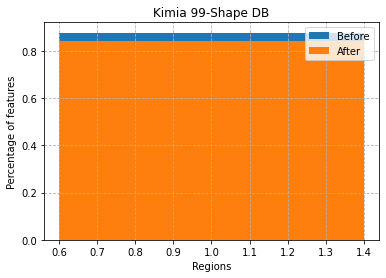

In [ ]:
# Plotting the histograms before and after apperance criteria is applied
plt.figure()
plt.title('Kimia 99-Shape DB')
plt.bar(region_vec_p,hist_region[:,1], label = 'Before')
plt.bar(region_vec_p,hist_region_s[:,1], label = 'After')
plt.legend()
plt.grid(linestyle='--')
plt.ylabel('Percentage of features')
plt.xlabel('Regions')

Feature selection indexing over the input matrix

In [ ]:
# Input matrix indexing
Xr = X.values
# Reduced matrix from feature selection indices
Xr = Xr[:,idx[1,:]]
Results = [hist_ftr_vec,hist_ftr_vec_sampled,Xr]
joblib.dump(Results, img_path + "ReductionSetResults"+ ".pkl")

['/content/drive/My Drive/Machine Learning/ML Codes/MLPython/Databases/CorrectedDBs/MPEG7_DB_Corrected/RegionSelection/ReliefF_RS_BoCF/ReductionSetResults.pkl']

# **Step 4: Centered Kernel Alignment projection**

Model description

In [ ]:
# Matrix declaration to store train/test matrices and their labels, and projection matrices from CKA
X_train_cka = []
X_test_cka  = []
y_train_cka = []
y_test_cka  = []
W_cka_L     = []
W_cka_LogR  = []
W_cka_lSVM  = []
    
# Step declaration
steps = [
        [('Preprocessing', StandardScaler()),
          ('Projection', MiniBatchCKA(Q = 0.95,batch = 70)),
          ('Preprocessing2',StandardScaler()),
          ('Classification',SGDClassifier())],      # Clasificador Lineal
        [('Preprocessing', StandardScaler()),
          ('Projection', MiniBatchCKA(Q = 0.95,batch = 70)),
          ('Preprocessing2',StandardScaler()),
          ('Classification',LogisticRegression())], # Regresion Logistica
        [('Preprocessing', StandardScaler()),
          ('Projection', MiniBatchCKA(Q = 0.95,batch = 70)),
          ('Preprocessing2',StandardScaler()),
          ('Classification',LinearSVC())],          # Maquina de Vectores de Soporte
        ]
    
# Grid declaration
parameters = [
            {'Classification__penalty': ['l1', 'l2', 'elasticnet'] },
            {'Classification__C': [0.01,0.1,1,10]},
            {'Classification__C': [0.1,1,10,100,1000]}
            ]

# Model labels
label_models = ['LinearCKA','LogisticRegressionCKA','LinearSVCCKA']

In [ ]:
# Directory to save results and plots

rslt_dir     = img_dir + '/NLDR/MPEG7_DB_CKA_Results/Results_CKA_NLDR_Py'
img_path     = img_dir + '/NLDR/MPEG7_DB_CKA_Results'

Loop to optimize CKA projection

0it [00:00, ?it/s]

Iteration =  1/10
Linear Model
it:1/50---cost:-2.09e+00--- elapsed:1.15 [s]



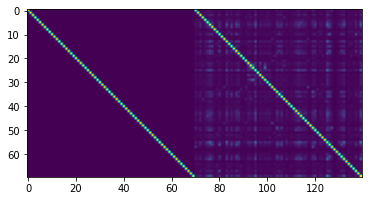

Logistic Regression Model
it:1/50---cost:-2.09e+00--- elapsed:1.16 [s]



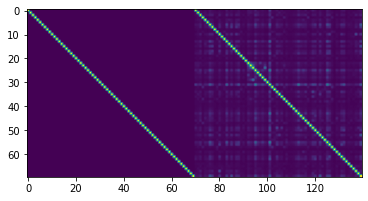

Linear SVM Model
it:1/50---cost:-2.09e+00--- elapsed:1.15 [s]



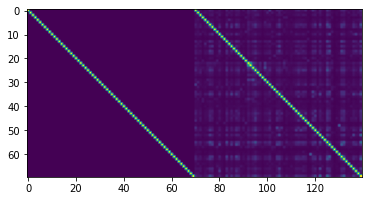

Guardando... LinearCKA_Fold1


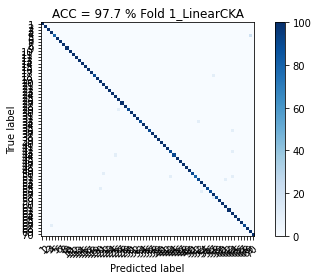

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       0.91      1.00      0.95        10
           5       1.00      0.80      0.89        10
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00        10
          10       1.00      1.00      1.00        10
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00        10
          14       1.00      1.00      1.00        10
          15       1.00      1.00      1.00        10
          16       1.00      1.00      1.00        10
          17       1.00      1.00      1.00        10
          18       1.00    

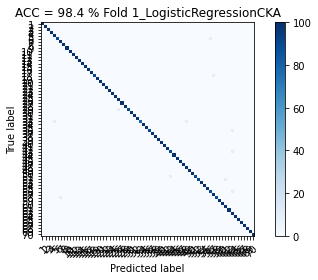

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        10
           5       0.91      1.00      0.95        10
           6       1.00      0.90      0.95        10
           7       0.91      1.00      0.95        10
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00        10
          10       1.00      1.00      1.00        10
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00        10
          14       1.00      1.00      1.00        10
          15       1.00      1.00      1.00        10
          16       1.00      1.00      1.00        10
          17       1.00      1.00      1.00        10
          18       1.00    

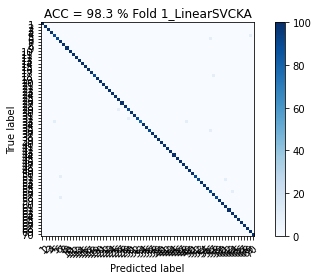

1it [05:18, 318.33s/it]

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        10
           5       0.90      0.90      0.90        10
           6       1.00      0.90      0.95        10
           7       0.83      1.00      0.91        10
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00        10
          10       1.00      1.00      1.00        10
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00        10
          14       1.00      1.00      1.00        10
          15       1.00      1.00      1.00        10
          16       1.00      1.00      1.00        10
          17       1.00      1.00      1.00        10
          18       1.00    

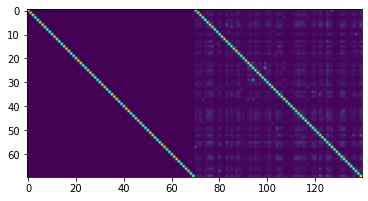

Logistic Regression Model
it:1/50---cost:-2.10e+00--- elapsed:1.16 [s]



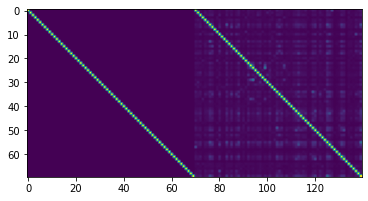

Linear SVM Model
it:1/50---cost:-2.10e+00--- elapsed:1.16 [s]



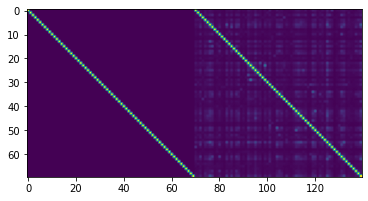

Guardando... LinearCKA_Fold2


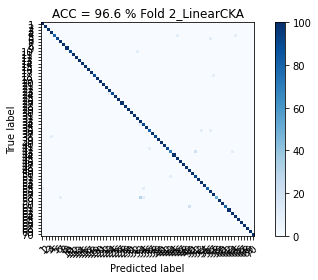

              precision    recall  f1-score   support

           1       0.91      1.00      0.95        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       0.91      1.00      0.95        10
           5       1.00      0.80      0.89        10
           6       1.00      0.90      0.95        10
           7       0.91      1.00      0.95        10
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00        10
          10       1.00      0.90      0.95        10
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00        10
          14       1.00      1.00      1.00        10
          15       1.00      1.00      1.00        10
          16       1.00      1.00      1.00        10
          17       1.00      1.00      1.00        10
          18       1.00    

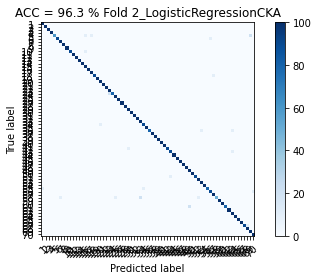

              precision    recall  f1-score   support

           1       0.91      1.00      0.95        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        10
           5       1.00      0.60      0.75        10
           6       1.00      0.90      0.95        10
           7       0.91      1.00      0.95        10
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00        10
          10       1.00      0.90      0.95        10
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00        10
          14       1.00      1.00      1.00        10
          15       0.83      1.00      0.91        10
          16       1.00      1.00      1.00        10
          17       0.91      1.00      0.95        10
          18       1.00    

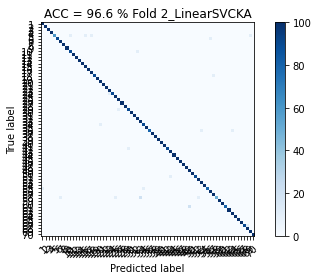

2it [10:37, 318.66s/it]

              precision    recall  f1-score   support

           1       0.91      1.00      0.95        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        10
           5       1.00      0.60      0.75        10
           6       1.00      0.90      0.95        10
           7       0.91      1.00      0.95        10
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00        10
          10       0.90      0.90      0.90        10
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00        10
          14       1.00      1.00      1.00        10
          15       0.91      1.00      0.95        10
          16       1.00      1.00      1.00        10
          17       0.91      1.00      0.95        10
          18       1.00    

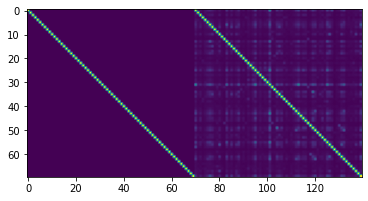

Logistic Regression Model
it:1/50---cost:-2.09e+00--- elapsed:1.29 [s]



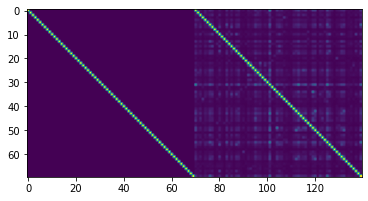

Linear SVM Model
it:1/50---cost:-2.10e+00--- elapsed:1.17 [s]



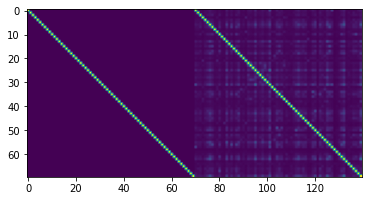

Guardando... LinearCKA_Fold3


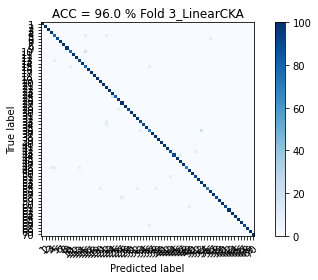

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       0.91      1.00      0.95        10
           5       0.80      0.80      0.80        10
           6       1.00      0.90      0.95        10
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00        10
          10       0.89      0.80      0.84        10
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00        10
          13       0.90      0.90      0.90        10
          14       1.00      1.00      1.00        10
          15       0.73      0.80      0.76        10
          16       1.00      1.00      1.00        10
          17       1.00      1.00      1.00        10
          18       1.00    

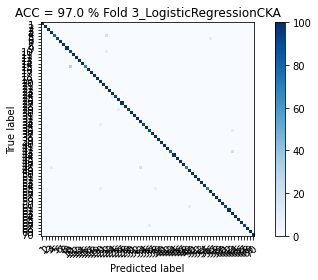

              precision    recall  f1-score   support

           1       0.91      1.00      0.95        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       0.91      1.00      0.95        10
           5       1.00      0.80      0.89        10
           6       1.00      0.90      0.95        10
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00        10
          10       0.75      0.90      0.82        10
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00        10
          14       1.00      1.00      1.00        10
          15       1.00      0.70      0.82        10
          16       1.00      1.00      1.00        10
          17       1.00      1.00      1.00        10
          18       1.00    

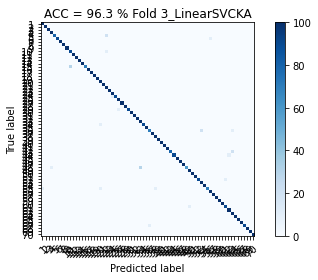

3it [16:15, 324.30s/it]

              precision    recall  f1-score   support

           1       0.91      1.00      0.95        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       0.91      1.00      0.95        10
           5       1.00      0.80      0.89        10
           6       1.00      0.90      0.95        10
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00        10
          10       0.75      0.90      0.82        10
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00        10
          14       1.00      1.00      1.00        10
          15       1.00      0.70      0.82        10
          16       1.00      1.00      1.00        10
          17       1.00      1.00      1.00        10
          18       1.00    

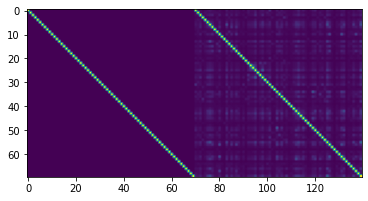

Logistic Regression Model
it:1/50---cost:-2.10e+00--- elapsed:1.17 [s]



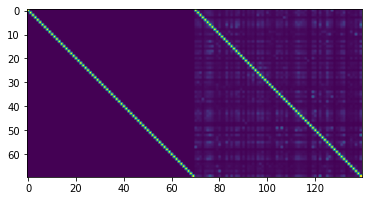

Linear SVM Model
it:1/50---cost:-2.09e+00--- elapsed:1.13 [s]



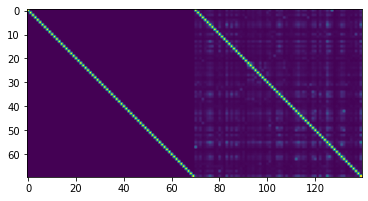

Guardando... LinearCKA_Fold4


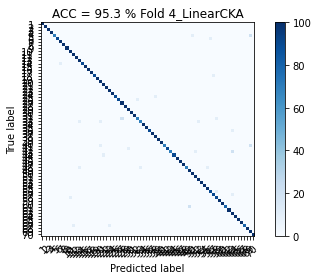

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        10
           5       1.00      0.70      0.82        10
           6       1.00      0.90      0.95        10
           7       0.91      1.00      0.95        10
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00        10
          10       0.91      1.00      0.95        10
          11       0.91      1.00      0.95        10
          12       1.00      1.00      1.00        10
          13       0.83      1.00      0.91        10
          14       1.00      0.90      0.95        10
          15       1.00      1.00      1.00        10
          16       1.00      1.00      1.00        10
          17       1.00      1.00      1.00        10
          18       1.00    

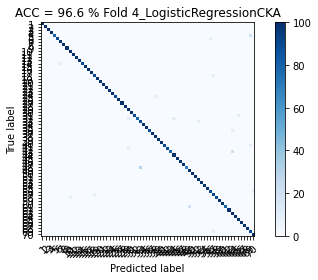

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        10
           5       1.00      0.80      0.89        10
           6       1.00      0.90      0.95        10
           7       0.91      1.00      0.95        10
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00        10
          10       0.91      1.00      0.95        10
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00        10
          14       1.00      0.90      0.95        10
          15       1.00      1.00      1.00        10
          16       1.00      1.00      1.00        10
          17       1.00      1.00      1.00        10
          18       0.90    

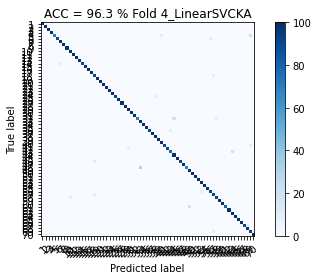

4it [21:36, 323.52s/it]

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        10
           5       1.00      0.70      0.82        10
           6       1.00      0.90      0.95        10
           7       0.91      1.00      0.95        10
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00        10
          10       0.91      1.00      0.95        10
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00        10
          14       1.00      0.90      0.95        10
          15       1.00      1.00      1.00        10
          16       1.00      1.00      1.00        10
          17       1.00      1.00      1.00        10
          18       0.82    

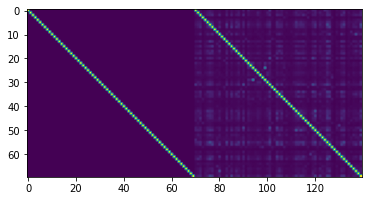

Logistic Regression Model
it:1/50---cost:-2.09e+00--- elapsed:1.24 [s]



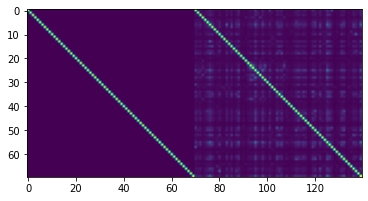

Linear SVM Model
it:1/50---cost:-2.09e+00--- elapsed:1.14 [s]



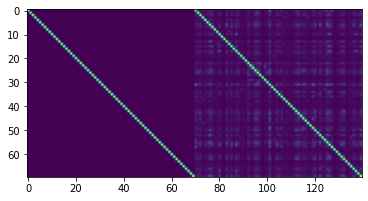

Guardando... LinearCKA_Fold5


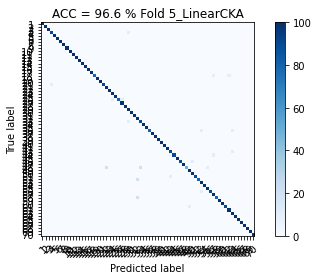

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       0.90      0.90      0.90        10
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00        10
          10       1.00      1.00      1.00        10
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00        10
          14       1.00      1.00      1.00        10
          15       1.00      1.00      1.00        10
          16       1.00      1.00      1.00        10
          17       1.00      1.00      1.00        10
          18       1.00    

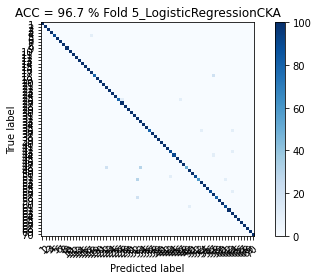

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        10
           5       1.00      0.90      0.95        10
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00        10
          10       1.00      1.00      1.00        10
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00        10
          14       1.00      1.00      1.00        10
          15       1.00      1.00      1.00        10
          16       1.00      1.00      1.00        10
          17       0.91      1.00      0.95        10
          18       1.00    

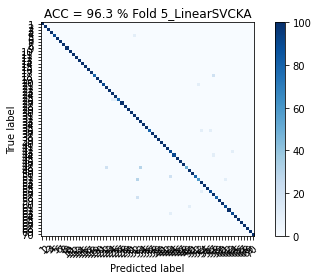

5it [26:57, 322.67s/it]

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        10
           5       1.00      0.90      0.95        10
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00        10
          10       1.00      1.00      1.00        10
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00        10
          14       1.00      1.00      1.00        10
          15       1.00      1.00      1.00        10
          16       1.00      1.00      1.00        10
          17       1.00      1.00      1.00        10
          18       1.00    

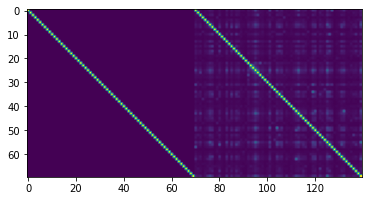

Logistic Regression Model
it:1/50---cost:-2.10e+00--- elapsed:1.14 [s]



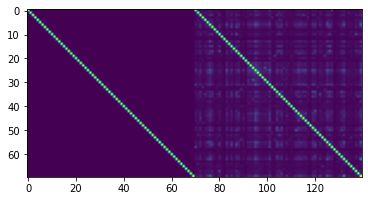

Linear SVM Model
it:1/50---cost:-2.10e+00--- elapsed:1.17 [s]



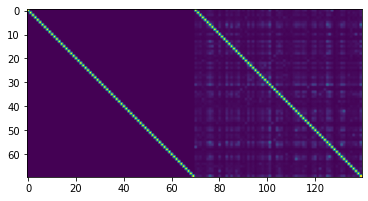

Guardando... LinearCKA_Fold6


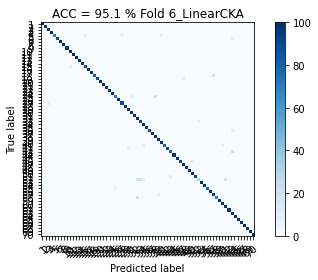

              precision    recall  f1-score   support

           1       0.91      1.00      0.95        10
           2       1.00      1.00      1.00        10
           3       0.91      1.00      0.95        10
           4       1.00      1.00      1.00        10
           5       1.00      0.70      0.82        10
           6       1.00      0.90      0.95        10
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00        10
          10       0.91      1.00      0.95        10
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00        10
          14       1.00      1.00      1.00        10
          15       0.90      0.90      0.90        10
          16       1.00      1.00      1.00        10
          17       1.00      1.00      1.00        10
          18       1.00    

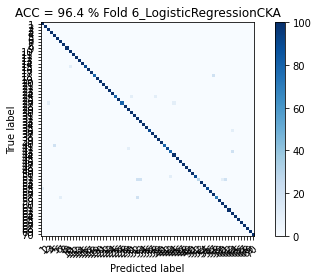

              precision    recall  f1-score   support

           1       0.91      1.00      0.95        10
           2       1.00      1.00      1.00        10
           3       0.91      1.00      0.95        10
           4       1.00      1.00      1.00        10
           5       0.83      1.00      0.91        10
           6       1.00      1.00      1.00        10
           7       0.91      1.00      0.95        10
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00        10
          10       0.91      1.00      0.95        10
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00        10
          14       1.00      1.00      1.00        10
          15       1.00      0.90      0.95        10
          16       1.00      1.00      1.00        10
          17       1.00      1.00      1.00        10
          18       1.00    

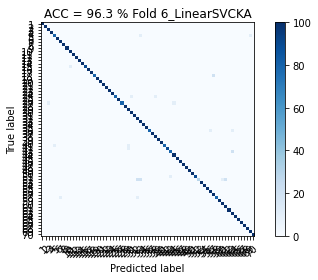

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       0.91      1.00      0.95        10
           4       1.00      1.00      1.00        10
           5       0.89      0.80      0.84        10
           6       1.00      1.00      1.00        10
           7       0.91      1.00      0.95        10
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00        10
          10       0.91      1.00      0.95        10
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00        10
          14       1.00      1.00      1.00        10
          15       1.00      0.90      0.95        10
          16       1.00      1.00      1.00        10
          17       1.00      1.00      1.00        10
          18       1.00    

6it [32:22, 323.19s/it]

Iteration =  7/10
Linear Model
it:1/50---cost:-2.10e+00--- elapsed:1.17 [s]



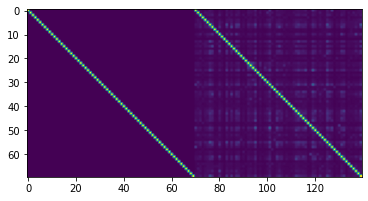

Logistic Regression Model
it:1/50---cost:-2.10e+00--- elapsed:1.18 [s]



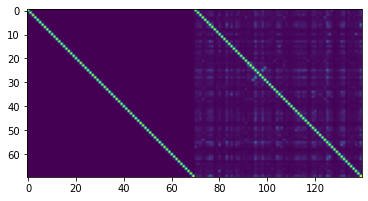

Linear SVM Model
it:1/50---cost:-2.09e+00--- elapsed:1.15 [s]



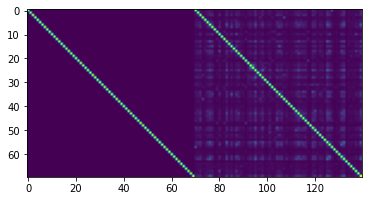

Guardando... LinearCKA_Fold7


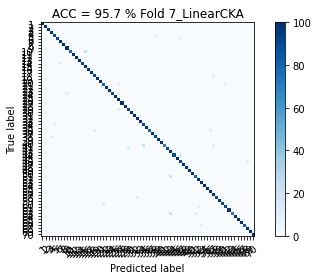

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       0.91      1.00      0.95        10
           5       0.90      0.90      0.90        10
           6       1.00      0.90      0.95        10
           7       0.91      1.00      0.95        10
           8       1.00      1.00      1.00        10
           9       0.91      1.00      0.95        10
          10       1.00      0.80      0.89        10
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00        10
          14       1.00      0.90      0.95        10
          15       0.83      1.00      0.91        10
          16       1.00      1.00      1.00        10
          17       1.00      1.00      1.00        10
          18       0.90    

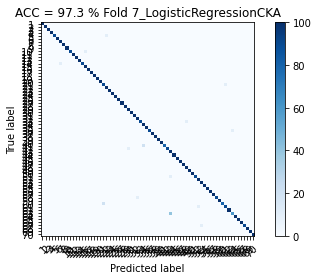

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        10
           5       1.00      0.90      0.95        10
           6       1.00      1.00      1.00        10
           7       0.91      1.00      0.95        10
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00        10
          10       1.00      0.90      0.95        10
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00        10
          14       1.00      0.90      0.95        10
          15       0.91      1.00      0.95        10
          16       1.00      1.00      1.00        10
          17       1.00      1.00      1.00        10
          18       1.00    

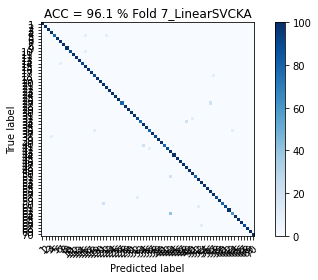

7it [37:40, 321.67s/it]

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       0.91      1.00      0.95        10
           5       1.00      0.80      0.89        10
           6       1.00      1.00      1.00        10
           7       0.91      1.00      0.95        10
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00        10
          10       1.00      0.90      0.95        10
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00        10
          14       1.00      0.90      0.95        10
          15       0.83      1.00      0.91        10
          16       1.00      1.00      1.00        10
          17       1.00      1.00      1.00        10
          18       0.90    

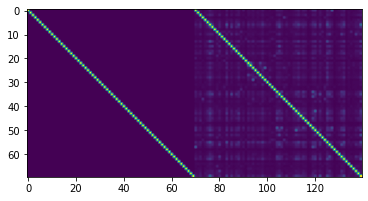

Logistic Regression Model
it:1/50---cost:-2.10e+00--- elapsed:1.17 [s]



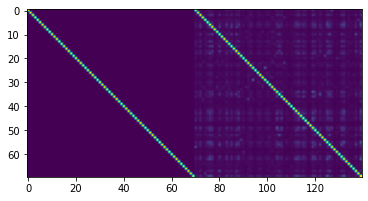

Linear SVM Model
it:1/50---cost:-2.10e+00--- elapsed:1.21 [s]



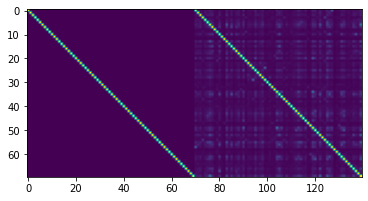

Guardando... LinearCKA_Fold8


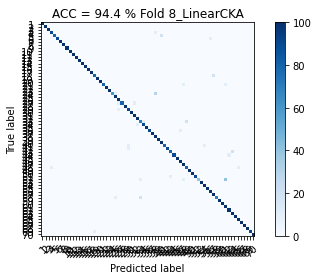

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       0.90      0.90      0.90        10
           5       1.00      0.80      0.89        10
           6       1.00      0.90      0.95        10
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00        10
          10       1.00      1.00      1.00        10
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00        10
          14       1.00      1.00      1.00        10
          15       1.00      1.00      1.00        10
          16       1.00      1.00      1.00        10
          17       1.00      1.00      1.00        10
          18       0.89    

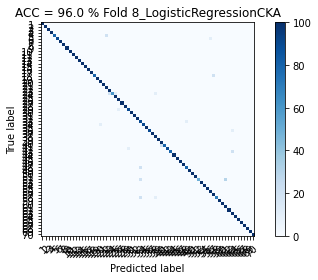

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        10
           5       1.00      0.80      0.89        10
           6       1.00      0.90      0.95        10
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00        10
          10       1.00      1.00      1.00        10
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00        10
          14       1.00      1.00      1.00        10
          15       1.00      1.00      1.00        10
          16       1.00      1.00      1.00        10
          17       1.00      1.00      1.00        10
          18       1.00    

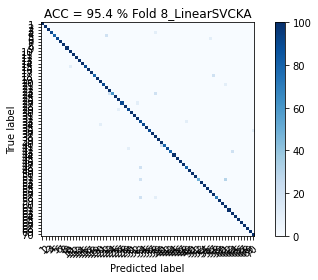

8it [43:02, 321.82s/it]

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       1.00      0.90      0.95        10
           5       1.00      0.80      0.89        10
           6       1.00      0.90      0.95        10
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00        10
          10       0.91      1.00      0.95        10
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00        10
          14       1.00      1.00      1.00        10
          15       1.00      0.90      0.95        10
          16       1.00      1.00      1.00        10
          17       1.00      1.00      1.00        10
          18       1.00    

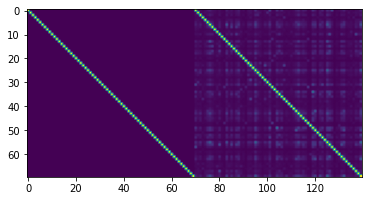

Logistic Regression Model
it:1/50---cost:-2.09e+00--- elapsed:1.18 [s]



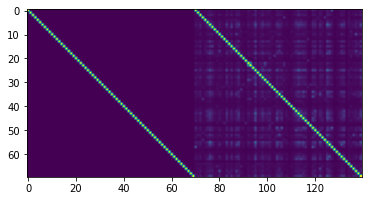

Linear SVM Model
it:1/50---cost:-2.10e+00--- elapsed:1.13 [s]



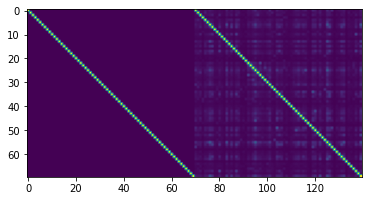

Guardando... LinearCKA_Fold9


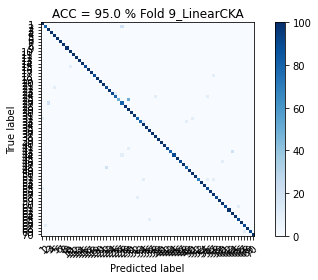

              precision    recall  f1-score   support

           1       0.83      1.00      0.91        10
           2       0.89      0.80      0.84        10
           3       0.83      1.00      0.91        10
           4       1.00      1.00      1.00        10
           5       0.91      1.00      0.95        10
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00        10
          10       0.91      1.00      0.95        10
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00        10
          14       1.00      1.00      1.00        10
          15       1.00      0.90      0.95        10
          16       1.00      1.00      1.00        10
          17       1.00      1.00      1.00        10
          18       1.00    

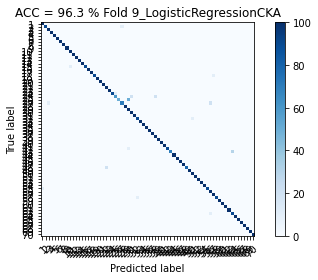

              precision    recall  f1-score   support

           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10
           3       0.91      1.00      0.95        10
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00        10
          10       0.91      1.00      0.95        10
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00        10
          14       1.00      1.00      1.00        10
          15       1.00      0.90      0.95        10
          16       1.00      1.00      1.00        10
          17       1.00      1.00      1.00        10
          18       1.00    

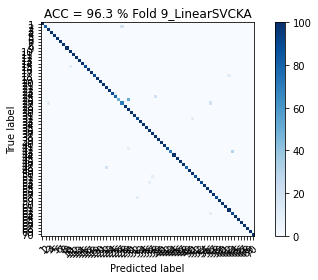

9it [48:20, 320.78s/it]

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      0.80      0.89        10
           3       0.91      1.00      0.95        10
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00        10
          10       0.91      1.00      0.95        10
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00        10
          14       1.00      1.00      1.00        10
          15       1.00      0.90      0.95        10
          16       1.00      1.00      1.00        10
          17       1.00      1.00      1.00        10
          18       1.00    

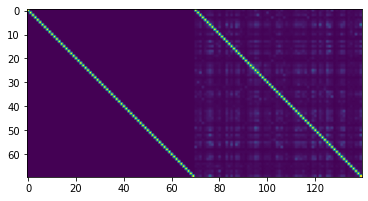

Logistic Regression Model
it:1/50---cost:-2.10e+00--- elapsed:1.14 [s]



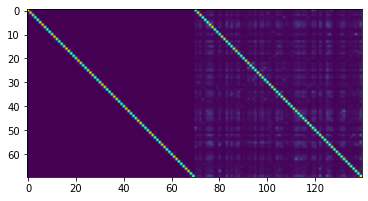

Linear SVM Model
it:1/50---cost:-2.10e+00--- elapsed:1.13 [s]



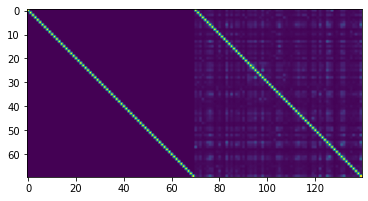

Guardando... LinearCKA_Fold10


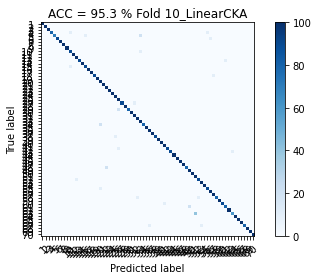

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       1.00      0.80      0.89        10
           5       1.00      0.70      0.82        10
           6       1.00      0.90      0.95        10
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00        10
          10       0.82      0.90      0.86        10
          11       1.00      1.00      1.00        10
          12       0.91      1.00      0.95        10
          13       1.00      0.90      0.95        10
          14       1.00      1.00      1.00        10
          15       0.90      0.90      0.90        10
          16       1.00      1.00      1.00        10
          17       1.00      1.00      1.00        10
          18       1.00    

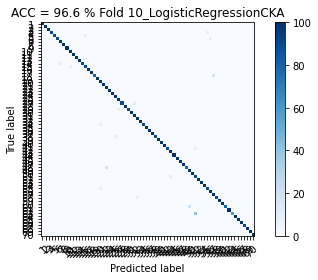

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       1.00      0.90      0.95        10
           5       1.00      0.90      0.95        10
           6       1.00      0.90      0.95        10
           7       0.91      1.00      0.95        10
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00        10
          10       0.91      1.00      0.95        10
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00        10
          14       1.00      0.90      0.95        10
          15       0.90      0.90      0.90        10
          16       1.00      1.00      1.00        10
          17       1.00      1.00      1.00        10
          18       1.00    

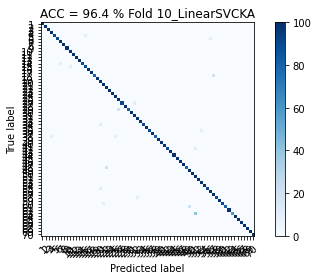

10it [53:46, 322.60s/it]

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       0.91      1.00      0.95        10
           5       1.00      0.90      0.95        10
           6       1.00      0.90      0.95        10
           7       0.91      1.00      0.95        10
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00        10
          10       0.91      1.00      0.95        10
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00        10
          14       1.00      0.90      0.95        10
          15       0.90      0.90      0.90        10
          16       1.00      1.00      1.00        10
          17       1.00      1.00      1.00        10
          18       1.00    

In [ ]:
# Traininig/Testing loop
fold = 0

for train_index, test_index in tqdm(sss.split(X,y)):
    # Training/testing index storage
    train_idx += [train_index]
    test_idx  += [test_index]
    
    # Number of partitions flag
    fold = fold + 1
    print("Iteration = ", str(fold) +'/'+ str(n_partitions))
    
    # Iteration file name 
    filename = img_path + "/Fold" + str(fold)

    # Train/Test partition and matrix storing to apply CKA over them for 
    # visualization
    X_train, X_test = Xr[train_index,:], Xr[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    X_train_cka += [X_train]
    X_test_cka  += [X_test]
    y_train_cka += [y_train]
    y_test_cka  += [y_test]

    # ---------------------------------------------------------------------------------------------------------------------------
    # Training
    
    # Linear
    print('Linear Model')
    # Using GridSearchCV 
    # hs_Lineal = GridSearchCV(Pipeline(steps[0]), parameters[0], n_jobs = 6, cv = 5, scoring = 'balanced_accuracy', verbose = 50)
    # Using RandomizedSearchCV
    hs_Lineal = RandomizedSearchCV(Pipeline(steps[0]), param_distributions=parameters[0],n_iter=10, cv=5, iid=False, n_jobs=-1)
    hs_Lineal.fit(X_train,y_train)
    # Projection matrix from CKA
    W_cka_L += [hs_Lineal.best_estimator_.named_steps['Projection'].Wcka]


    # Logistic Regression
    print('Logistic Regression Model')
    # Usaing GridSearchCV 
    # hs_LogR = GridSearchCV(Pipeline(steps[1]), parameters[1], n_jobs = 6, cv = 5, scoring = 'balanced_accuracy', verbose = 50)
    # Using RandomizedSearchCV
    hs_LogR = RandomizedSearchCV(Pipeline(steps[1]), param_distributions=parameters[1],n_iter=10, cv=5, iid=False,n_jobs=-1)
    hs_LogR.fit(X_train,y_train)
    # Projection matrix from CKA
    W_cka_LogR += [hs_LogR.best_estimator_.named_steps['Projection'].Wcka]
  

    # Linear SVM
    print('Linear SVM Model')
    # Using GridSearchCV 
    #hs_lSVM = GridSearchCV(Pipeline(steps[2]), parameters[2], n_jobs = 6, cv = 5, scoring = 'balanced_accuracy', verbose = 50)
    # Using RandomizedSearchCV
    hs_lSVM = RandomizedSearchCV(Pipeline(steps[2]), param_distributions=parameters[2],n_iter=10, cv=5, iid=False, n_jobs=-1)  
    hs_lSVM.fit(X_train,y_train)
    # Projection matrix from CKA
    W_cka_lSVM += [hs_lSVM.best_estimator_.named_steps['Projection'].Wcka]

    # ---------------------------------------------------------------------------------------------------------------------------
    # Validation
    
    # Linear
    y_pred_L           = hs_Lineal.best_estimator_.predict(X_test)
    accuracy_L[fold-1] = accuracy_score(y_test,y_pred_L)
    cm_temp            = confusion_matrix(y_test,y_pred_L)
    cm_L[fold-1,:,:]   = 100*cm_temp.astype('float') / cm_temp.sum(axis=1)[:, np.newaxis]
    plot_confusion_matrix(y_test, y_pred_L, classes=np.unique(y),normalize=True,title='ACC = %.1f %% Fold %d' % (100*accuracy_L[fold-1],fold) + '_'+ label_models[0])
    plt.autoscale()
    save_fig(img_path,label_models[0]+'_Fold'+str(fold))                      
    plt.show()
    cr_L += [classification_report(y_test,y_pred_L)]
    print(cr_L[-1])
    # Best model storage
    # best_mod_L += [hs_Lineal.best_estimator_, accuracy_L,cm_L,cr_L, sel_fts_L]
    # best_mod_L += [hs_Lineal.best_estimator_]
    best_pms_L += [hs_Lineal.best_params_,accuracy_L,cm_L,cr_L,W_cka_L]
    joblib.dump(best_pms_L, filename + "LinealCKA" + ".pkl")


    # Logistic Regression
    y_pred_LogR          = hs_LogR.best_estimator_.predict(X_test)
    accuracy_LogR[fold-1]= accuracy_score(y_test,y_pred_LogR)
    cm_temp              = confusion_matrix(y_test,y_pred_LogR)
    cm_LogR[fold-1,:,:]  = 100*cm_temp.astype('float') / cm_temp.sum(axis=1)[:, np.newaxis]
    plot_confusion_matrix(y_test, y_pred_LogR, classes=np.unique(y),normalize=True,title='ACC = %.1f %% Fold %d' % (100*accuracy_LogR[fold-1],fold) + '_'+ label_models[1])
    plt.autoscale()
    save_fig(img_path,label_models[1]+'_Fold'+str(fold))                      
    plt.show()
    cr_LogR += [classification_report(y_test,y_pred_LogR)]
    print(cr_LogR[-1])
    # Best model storage
    # best_mod_LogR += [hs_LogR.best_estimator_, accuracy_LogR,cm_LogR,cr_LogR, sel_fts_LogR]
    # best_mod_LogR += [hs_LogR.best_estimator_]
    best_pms_LogR += [hs_LogR.best_params_,accuracy_LogR,cm_LogR,cr_LogR,W_cka_LogR]
    joblib.dump(best_pms_LogR, filename + "LogRCKA" + ".pkl")


    # Linear SVM
    y_pred_lSVM          = hs_lSVM.best_estimator_.predict(X_test)
    accuracy_lSVM[fold-1]= accuracy_score(y_test,y_pred_lSVM)
    cm_temp              = confusion_matrix(y_test,y_pred_lSVM)
    cm_LogR[fold-1,:,:]  = 100*cm_temp.astype('float') / cm_temp.sum(axis=1)[:, np.newaxis]
    plot_confusion_matrix(y_test, y_pred_lSVM, classes=np.unique(y),normalize=True,title='ACC = %.1f %% Fold %d' % (100*accuracy_lSVM[fold-1],fold) + '_'+ label_models[2])
    plt.autoscale()
    save_fig(img_path,label_models[2]+'_Fold'+str(fold))                      
    plt.show()
    cr_lSVM += [classification_report(y_test,y_pred_lSVM)]
    print(cr_lSVM[-1])
    # Best model storage
    # best_mod_lSVM += [hs_lSVM.best_estimator_, accuracy_lSVM,cm_lSVM,cr_lSVM, sel_fts_lSVM]
    # best_mod_lSVM += [hs_lSVM.best_estimator_]
    best_pms_lSVM += [hs_lSVM.best_params_,accuracy_lSVM,cm_lSVM,cr_lSVM,W_cka_lSVM]
    joblib.dump(best_pms_lSVM, filename + "lSVMCKA" + ".pkl")

Storing the CKA projection results

In [ ]:
# Results dictionary creation
L_dict = {'accuracy_L': accuracy_L,
          'cm_L': cm_L,
          'cr_L': cr_L,
          'W_cka_L': W_cka_L,
          'X_train_cka': X_train_cka,
          'X_test_cka': X_test_cka,
          'y_train_cka':y_train_cka,
          'y_test_cka':y_test_cka}

LogR_dict = {'accuracy_LogR': accuracy_LogR,
            'cm_LogR': cm_LogR,
            'cr_LogR': cr_LogR,
            'W_cka_LogR': W_cka_LogR,
            'X_train_cka': X_train_cka,
            'X_test_cka': X_test_cka,
            'y_train_cka':y_train_cka,
            'y_test_cka':y_test_cka}

lSVM_dict = {'accuracy_lSVM': accuracy_lSVM,
            'cm_lSVM': cm_lSVM,
            'cr_lSVM': cr_lSVM,
            'W_cka_lSVM': W_cka_lSVM,
            'X_train_cka': X_train_cka,
            'X_test_cka': X_test_cka,
            'y_train_cka':y_train_cka,
            'y_test_cka':y_test_cka}

Results = [L_dict, LogR_dict, lSVM_dict]

joblib.dump(Results, rslt_dir + ".pkl")

['/content/drive/My Drive/Machine Learning/ML Codes/MLPython/Databases/CorrectedDBs/MPEG7_DB_Corrected/RegionSelection/ReliefF_CKA_RS_BoCF/Results_ReliefF_CKA_RS_BoCF_Py.pkl']

Average result printing

In [ ]:
print('Linear Classifier')
print(str(np.mean(np.array(Results[0]['accuracy_L']))*100) + '+/-' + str(np.std(np.array(Results[0]['accuracy_L']))*100))

print('Logistic Regression Classifier')
print(str(np.mean(np.array(Results[1]['accuracy_LogR']))*100) + '+/-' + str(np.std(np.array(Results[1]['accuracy_LogR']))*100))

print('Linear SVM Classifier')
print(str(np.mean(np.array(Results[2]['accuracy_lSVM']))*100) + '+/-' + str(np.std(np.array(Results[2]['accuracy_lSVM']))*100))

Linear Classifier
95.77142857142856+/-0.9151781358883981
Logistic Regression Classifier
96.75714285714285+/-0.6579187965525413
Linear SVM Classifier
96.42857142857142+/-0.6821335077893332


Projection matrix plotting

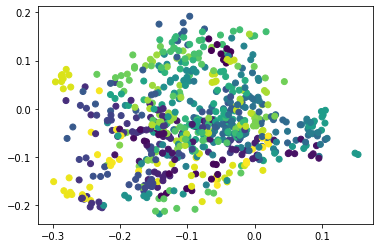

In [ ]:
W    = Results[1]['W_cka_LogR'][0]
Xp   = X_train_cka[0].dot(W)
# Plotting the projection matrix
plt.scatter(Xp[:,1],Xp[:,2],c = y_train_cka[0])

# **Step 5: Region Selection**

In [ ]:
The algorithm now runs over the regions to know whose are more informative than others

In [ ]:
# Declaracion de variables
n_partitions = 10
test_per     = 0.695
n_classes    = len(np.unique(y))
f_step       = 1500
ftr_vec      = np.arange(f_step,int((X.shape[1]))+f_step,f_step).astype(int)
fold         = 0
# Arrays and lists to store at each fold
train_idx    = []
test_idx     = []
accuracy_L   = np.zeros((n_partitions,len(ftr_vec)))
accuracy_LogR= np.zeros((n_partitions,len(ftr_vec)))
accuracy_lSVM= np.zeros((n_partitions,len(ftr_vec)))
cm_L         = np.zeros((n_partitions,n_classes,n_classes))
cm_LogR      = np.zeros((n_partitions,n_classes,n_classes))
cm_lSVM      = np.zeros((n_partitions,n_classes,n_classes))
cr_L         = []
cr_LogR      = []
cr_lSVM      = []
best_mod_L   = []
best_mod_LogR= []
best_mod_lSVM= []
best_pms_L   = []
best_pms_LogR= []
best_pms_lSVM= []

In [ ]:
# Setting the data partition scheme to work like HoldOut validation
sss = StratifiedShuffleSplit(n_splits = n_partitions, test_size = test_per, random_state=42)

In [ ]:
# Step declaration
steps = [
        [('Preprocessing', StandardScaler()),
          ('Classification',SGDClassifier())],      # Clasificador Lineal
        ]
    
# Grid declaration
parameters = [
            {'Classification__penalty': ['l1', 'l2', 'elasticnet'] },
            ]

# Model labels
label_models = ['Linear']

In [ ]:
# Directory to save results and plots

rslt_dir     = img_dir + '/RegionSelection/RS_BoCF/Results_RS_BoCF_Py'
sys.path.append(rslt_dir)
img_path     = img_dir + '/RegionSelection/RS_BoCF/'
sys.path.append(img_path)

In [ ]:
# Traininig/Testing loop

for feature in range(0,len(ftr_vec)): # For loop over regions
  print("Region = ", str(feature+1) +'/'+ str(21))
  fold = 0
  # Initializa variables
  train_idx    = []
  test_idx     = []
  cm_L         = np.zeros((n_partitions,n_classes,n_classes))
  cr_L         = []
  best_mod_L   = []
  best_pms_L   = []
  for train_index, test_index in tqdm(sss.split(X,y)):
      # Training/testing index storage
      train_idx += [train_index]
      test_idx  += [test_index]
      
      # Number of partitions flag
      fold = fold + 1
      print("Iteration = ", str(fold) +'/'+ str(n_partitions))
      
      # Iteration file name 
      filename = img_path + "/Fold" + str(fold) + "Region" + str(feature+1)

      # Train/Test partition and matrix storing to apply CKA over them for 
      # visualization
      X_train, X_test = X[train_index,0:ftr_vec[feature]], X[test_index,0:ftr_vec[feature]]
      y_train, y_test = y[train_index], y[test_index]

      # ---------------------------------------------------------------------------------------------------------------------------
      # Training
      
      # Linear
      print('Linear Model')
      # Using GridSearchCV 
      hs_Lineal = GridSearchCV(Pipeline(steps[0]), parameters[0], n_jobs = 25, cv = 5, scoring = 'balanced_accuracy', verbose = 50)
      # Using RandomizedSearchCV
      # hs_Lineal = RandomizedSearchCV(Pipeline(steps[0]), param_distributions=parameters[0],n_iter=10, cv=5, iid=False, n_jobs=2)
      hs_Lineal.fit(X_train,y_train)
      # Projection matrix from CKA
      # W_cka_L += [hs_Lineal.best_estimator_.named_steps['Projection'].Wcka]


      # ---------------------------------------------------------------------------------------------------------------------------
      # Validation
      
      # Linear
      y_pred_L           = hs_Lineal.best_estimator_.predict(X_test)
      accuracy_L[fold-1,feature] = accuracy_score(y_test,y_pred_L)
      cm_temp            = confusion_matrix(y_test,y_pred_L)
      cm_L[fold-1,:,:]   = 100*cm_temp.astype('float') / cm_temp.sum(axis=1)[:, np.newaxis]
      plot_confusion_matrix(y_test, y_pred_L, classes=np.unique(y),normalize=True,title='ACC = %.1f %% Fold %d' % (100*accuracy_L[fold-1,feature],fold) + '_'+ label_models[0])
      plt.autoscale()
      save_fig(img_path,label_models[0]+'_Fold'+str(fold)+ "Region" + str(feature+1))                      
      plt.show()
      cr_L += [classification_report(y_test,y_pred_L)]
      print(cr_L[-1])
      # Best model storage
      # best_mod_L += [hs_Lineal.best_estimator_, accuracy_L,cm_L,cr_L, sel_fts_L]
      # best_mod_L += [hs_Lineal.best_estimator_]
      # best_pms_L += [hs_Lineal.best_params_,accuracy_L,cm_L,cr_L,W_cka_L]
      best_pms_L += [hs_Lineal.best_params_]
      # joblib.dump(best_pms_L, filename + "LinealCKA" + ".pkl")

  # Results dictionary creation
  L_dict = {'accuracy_L': accuracy_L,
            'cm_L': cm_L,
            'cr_L': cr_L,
            'best_pms_L':best_pms_L}

  Results = [L_dict]

  joblib.dump(Results, rslt_dir + "Region" + str(feature+1) +".pkl")

In [ ]:
# Get mean and standard deviation vectors 
mean_vec_l    = np.mean(Results[0]['accuracy_L'], axis = 0)
std_vec_l     = np.std(Results[0]['accuracy_L'], axis = 0)
# mean_vec_lr   = np.mean(Results[1]['accuracy_LogR'], axis = 0)
# std_vec_lr    = np.std(Results[1]['accuracy_LogR'], axis = 0)
# mean_vec_lsvm = np.mean(Results[2]['accuracy_lSVM'], axis = 0)
# std_vec_lsvm  = np.std(Results[2]['accuracy_lSVM'], axis = 0)
reg_vec  = np.arange(1,22,1)

# Plotting
plt.figure()
plt.plot(reg_vec,mean_vec_l)
plt.fill_between(reg_vec, mean_vec_l-std_vec_l, mean_vec_l+std_vec_l, alpha=0.2)
# plt.ylim(0.7,0.9)
# # plt.plot(reg_vec,mean_vec_lr)
# # plt.fill_between(reg_vec, mean_vec_lr-std_vec_lr, mean_vec_lr+std_vec_lr, alpha=0.2)
# # plt.plot(reg_vec,mean_vec_lsvm)
# # plt.fill_between(reg_vec, mean_vec_lsvm-std_vec_lsvm, mean_vec_lsvm+std_vec_lsvm, alpha=0.2)
plt.xticks(reg_vec, reg_vec)

In [ ]:
# Storing the data
Data = np.c_[reg_vec.reshape(1,-1).T,mean_vec_l.T,std_vec_l.T]
np.savetxt(img_path + '/MPEG7DBRSL.dat', Data, delimiter='   ')

In [ ]:
# Computing optimal number of regiones acording to target
Results      = np.loadtxt(img_path + 'MPEG7DBRSL.dat')
# Normalizing the number of regions
Results[:,0] = Results[:,0] - min(Results[:,0])
Results[:,0] = Results[:,0]/max(Results[:,0])
# Normalizing the accuracy
Results[:,1] = Results[:,1] - min(Results[:,1])
Results[:,1] = Results[:,1]/max(Results[:,1])
# Normalizing the standard deviation
Results[:,2] = Results[:,2] - min(Results[:,2])
Results[:,2] = Results[:,2]/max(Results[:,2])
# Ideal result
Target       = np.array((0,1,0))
# Computing the minimum distance between the ideal result and our results
dist         = cdist(Target.reshape(1,-1),Results, 'euclidean')
# Showing the optimum number of regions
print('The ideal number of regions is: ' + str((np.argmin(dist)+1)))

The ideal number of regions is: 5


# **Step 6: Projecting the selected regions using CKA**

In [ ]:
# Selecting the regions to project
X       = X.values[:,0:7500]

In [ ]:
# Variable declaration
n_partitions = 10
test_per     = 0.5
n_classes    = len(np.unique(y))
fold         = 0
train_idx    = []
test_idx     = []
alpha_L      = []
alpha_LogR   = []
alpha_lSVM   = []
sel_fts_L    = []
sel_fts_LogR = []
sel_fts_lSVM = []
thld_L       = []
thld_LogR    = []
thld_lSVM    = []
sel_fts_Lt   = []
sel_fts_LogRt= []
sel_fts_lSVMt= []
nfeats_L     = []
nfeats_LogR  = []
nfeats_lSVM  = []
accuracy_L   = np.zeros((n_partitions))
accuracy_LogR= np.zeros((n_partitions))
accuracy_lSVM= np.zeros((n_partitions))
cm_L         = np.zeros((n_partitions,n_classes,n_classes))
cm_LogR      = np.zeros((n_partitions,n_classes,n_classes))
cm_lSVM      = np.zeros((n_partitions,n_classes,n_classes))
cr_L         = []
cr_LogR      = []
cr_lSVM      = []
best_mod_L   = []
best_mod_LogR= []
best_mod_lSVM= []
best_pms_L   = []
best_pms_LogR= []
best_pms_lSVM= [] 

In [ ]:
# Setting the data partition scheme to work like HoldOut validation
sss = StratifiedShuffleSplit(n_splits = n_partitions, test_size = test_per, random_state=42)

In [ ]:
# Matrix declaration to store train/test matrices and their labels, and projection matrices from CKA
X_train_cka = []
X_test_cka  = []
y_train_cka = []
y_test_cka  = []
W_cka_L     = []
W_cka_LogR  = []
W_cka_lSVM  = []
    
# Step declaration
steps = [
        [('Preprocessing', StandardScaler()),
          ('Projection', MiniBatchCKA(Q = 0.95, batch=70)),
          ('Preprocessing2',StandardScaler()),
          ('Classification',SGDClassifier())],      # Clasificador Lineal
        [('Preprocessing', StandardScaler()),
          ('Projection', MiniBatchCKA(Q = 0.95, batch=70)),
          ('Preprocessing2',StandardScaler()),
          ('Classification',LogisticRegression())], # Regresion Logistica
        [('Preprocessing', StandardScaler()),
          ('Projection', MiniBatchCKA(Q = 0.95, batch=70)),
          ('Preprocessing2',StandardScaler()),
          ('Classification',LinearSVC())],          # Maquina de Vectores de Soporte
        ]
    
# Grid declaration
parameters = [
            {'Classification__penalty': ['l1', 'l2', 'elasticnet'] },
            {'Classification__C': [0.01,0.1,1,10]},
            {'Classification__C': [0.1,1,10,100,1000]}
            ]

# Model labels
label_models = ['LinearCKA','LogisticRegressionCKA','LinearSVCKA']

In [ ]:
# Directory to save results and plots
rslt_dir     = img_dir + '/RegionSelection/ReliefF_CKA_RS_BoCF/Results_ReliefF_CKA_RS_BoCF_Py'
sys.path.append(rslt_dir)
img_path     = img_dir + '/RegionSelection/ReliefF_CKA_RS_BoCF/'
sys.path.append(img_path)

Loop to optimize CKA projection

0it [00:00, ?it/s]

Iteration =  1/10
Linear Model
it:1/50---cost:-2.12e+00--- elapsed:5.83 [s]



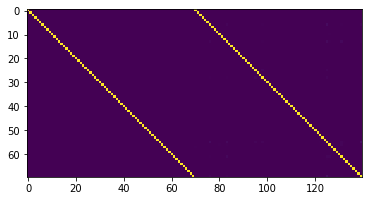

Logistic Regression Model
it:1/50---cost:-2.12e+00--- elapsed:5.28 [s]



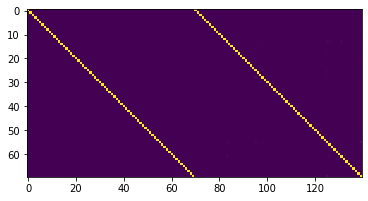

Linear SVM Model
it:1/50---cost:-2.12e+00--- elapsed:5.24 [s]



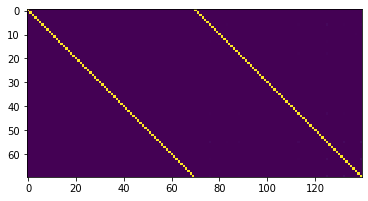

Guardando... LinearCKA_Fold1


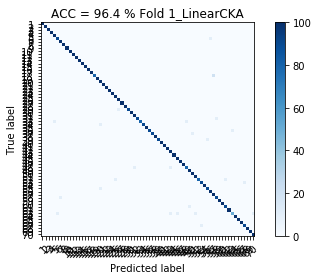

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        10
           5       0.91      1.00      0.95        10
           6       0.90      0.90      0.90        10
           7       0.91      1.00      0.95        10
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00        10
          10       1.00      1.00      1.00        10
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00        10
          14       1.00      1.00      1.00        10
          15       1.00      1.00      1.00        10
          16       1.00      1.00      1.00        10
          17       1.00      1.00      1.00        10
          18       1.00    

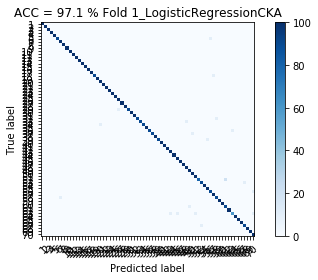

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00        10
           6       1.00      0.90      0.95        10
           7       0.91      1.00      0.95        10
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00        10
          10       1.00      1.00      1.00        10
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00        10
          14       1.00      1.00      1.00        10
          15       1.00      1.00      1.00        10
          16       1.00      1.00      1.00        10
          17       1.00      1.00      1.00        10
          18       1.00    

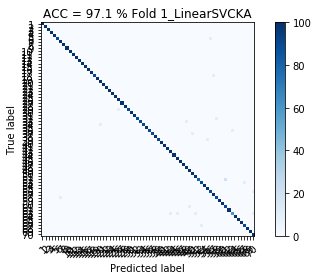

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00        10
           6       1.00      0.90      0.95        10
           7       0.91      1.00      0.95        10
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00        10
          10       1.00      1.00      1.00        10
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00        10
          14       1.00      1.00      1.00        10
          15       1.00      1.00      1.00        10
          16       1.00      1.00      1.00        10
          17       1.00      1.00      1.00        10
          18       1.00    

1it [03:20, 200.00s/it]

Iteration =  2/10
Linear Model
it:1/50---cost:-2.12e+00--- elapsed:5.32 [s]



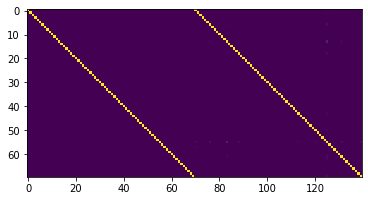

Logistic Regression Model
it:1/50---cost:-2.12e+00--- elapsed:5.32 [s]



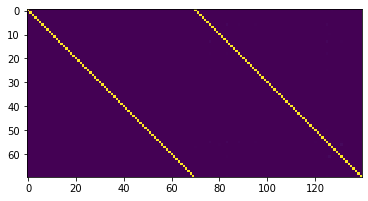

Linear SVM Model
it:1/50---cost:-2.12e+00--- elapsed:5.28 [s]



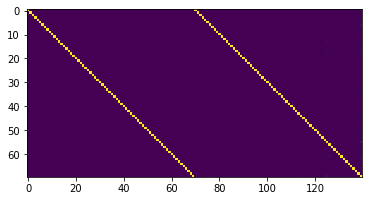

Guardando... LinearCKA_Fold2


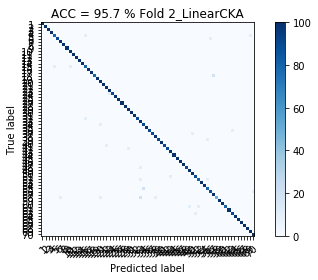

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        10
           5       0.89      0.80      0.84        10
           6       1.00      0.90      0.95        10
           7       0.91      1.00      0.95        10
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00        10
          10       0.91      1.00      0.95        10
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00        10
          14       1.00      1.00      1.00        10
          15       0.80      0.80      0.80        10
          16       1.00      1.00      1.00        10
          17       1.00      1.00      1.00        10
          18       1.00    

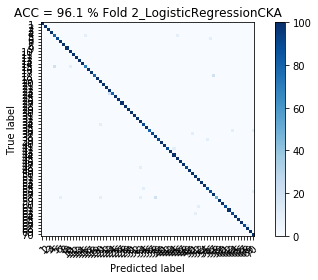

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        10
           5       0.80      0.80      0.80        10
           6       1.00      0.90      0.95        10
           7       0.91      1.00      0.95        10
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00        10
          10       0.91      1.00      0.95        10
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00        10
          14       1.00      1.00      1.00        10
          15       0.88      0.70      0.78        10
          16       1.00      1.00      1.00        10
          17       1.00      1.00      1.00        10
          18       1.00    

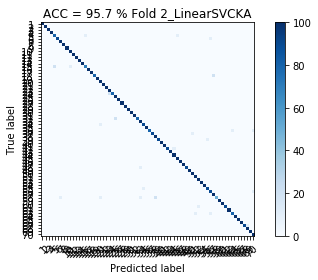

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        10
           5       0.80      0.80      0.80        10
           6       1.00      0.90      0.95        10
           7       0.91      1.00      0.95        10
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00        10
          10       0.91      1.00      0.95        10
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00        10
          14       1.00      1.00      1.00        10
          15       0.88      0.70      0.78        10
          16       1.00      1.00      1.00        10
          17       1.00      1.00      1.00        10
          18       1.00    

2it [06:54, 204.49s/it]

Iteration =  3/10
Linear Model
it:1/50---cost:-2.12e+00--- elapsed:5.34 [s]



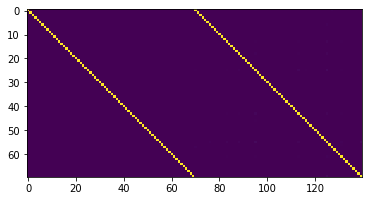

Logistic Regression Model
it:1/50---cost:-2.12e+00--- elapsed:5.23 [s]



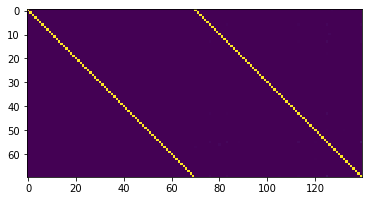

Linear SVM Model
it:1/50---cost:-2.12e+00--- elapsed:5.06 [s]



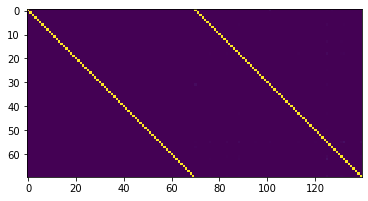

Guardando... LinearCKA_Fold3


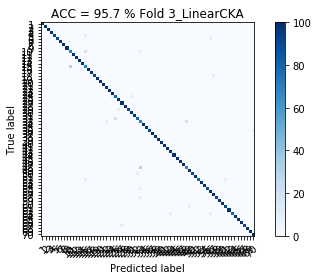

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        10
           5       1.00      0.90      0.95        10
           6       1.00      0.90      0.95        10
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00        10
          10       0.70      0.70      0.70        10
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00        10
          14       1.00      1.00      1.00        10
          15       0.64      0.70      0.67        10
          16       1.00      1.00      1.00        10
          17       1.00      1.00      1.00        10
          18       1.00    

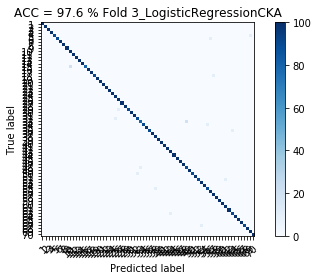

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        10
           5       1.00      0.90      0.95        10
           6       1.00      0.90      0.95        10
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00        10
          10       0.83      1.00      0.91        10
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00        10
          14       1.00      1.00      1.00        10
          15       1.00      0.80      0.89        10
          16       1.00      1.00      1.00        10
          17       1.00      1.00      1.00        10
          18       1.00    

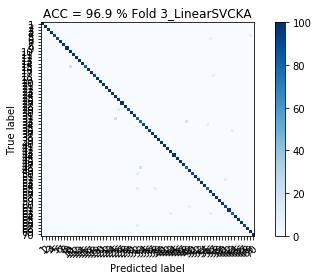

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        10
           5       1.00      0.90      0.95        10
           6       1.00      0.90      0.95        10
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00        10
          10       0.83      1.00      0.91        10
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00        10
          14       1.00      1.00      1.00        10
          15       1.00      0.80      0.89        10
          16       1.00      1.00      1.00        10
          17       1.00      1.00      1.00        10
          18       1.00    

3it [11:11, 219.97s/it]

Iteration =  4/10
Linear Model
it:1/50---cost:-2.12e+00--- elapsed:5.23 [s]



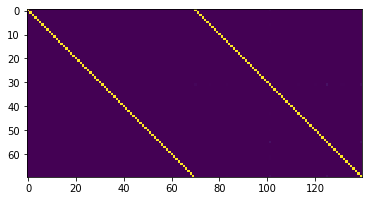

Logistic Regression Model
it:1/50---cost:-2.12e+00--- elapsed:5.25 [s]



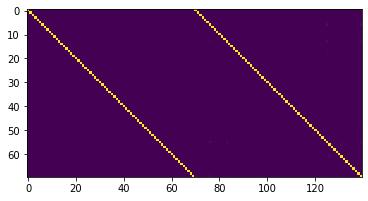

Linear SVM Model
it:1/50---cost:-2.12e+00--- elapsed:5.38 [s]



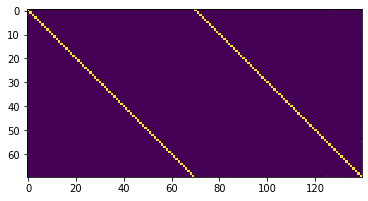

Guardando... LinearCKA_Fold4


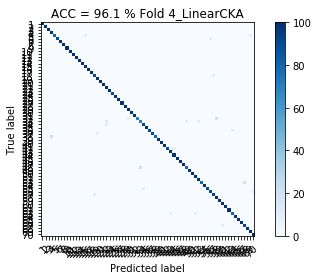

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       0.83      1.00      0.91        10
           5       1.00      0.80      0.89        10
           6       1.00      0.90      0.95        10
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00        10
          10       1.00      1.00      1.00        10
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00        10
          14       1.00      1.00      1.00        10
          15       0.91      1.00      0.95        10
          16       1.00      1.00      1.00        10
          17       1.00      1.00      1.00        10
          18       0.90    

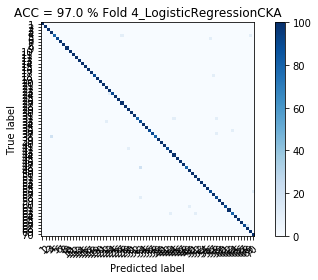

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       0.83      1.00      0.91        10
           5       1.00      0.80      0.89        10
           6       1.00      0.90      0.95        10
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00        10
          10       1.00      1.00      1.00        10
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00        10
          14       1.00      1.00      1.00        10
          15       1.00      1.00      1.00        10
          16       1.00      1.00      1.00        10
          17       1.00      1.00      1.00        10
          18       1.00    

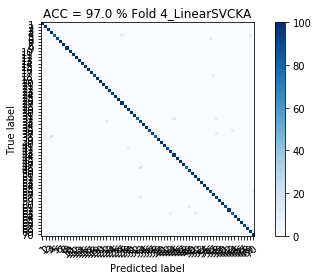

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       0.83      1.00      0.91        10
           5       1.00      0.80      0.89        10
           6       1.00      0.90      0.95        10
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00        10
          10       1.00      1.00      1.00        10
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00        10
          14       1.00      1.00      1.00        10
          15       1.00      1.00      1.00        10
          16       1.00      1.00      1.00        10
          17       1.00      1.00      1.00        10
          18       1.00    

4it [14:38, 216.23s/it]

Iteration =  5/10
Linear Model
it:1/50---cost:-2.12e+00--- elapsed:5.49 [s]



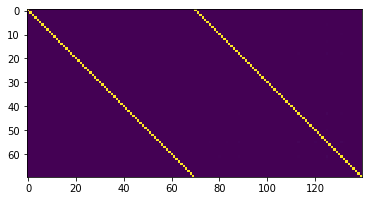

Logistic Regression Model
it:1/50---cost:-2.12e+00--- elapsed:5.41 [s]



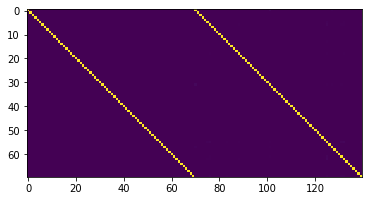

Linear SVM Model
it:1/50---cost:-2.12e+00--- elapsed:5.30 [s]



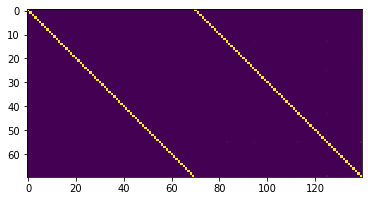

Guardando... LinearCKA_Fold5


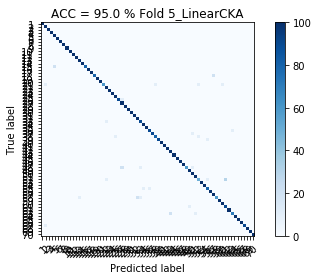

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       0.83      1.00      0.91        10
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        10
           5       0.83      1.00      0.91        10
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00        10
          10       1.00      1.00      1.00        10
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00        10
          13       0.91      1.00      0.95        10
          14       1.00      1.00      1.00        10
          15       1.00      0.80      0.89        10
          16       1.00      1.00      1.00        10
          17       1.00      1.00      1.00        10
          18       1.00    

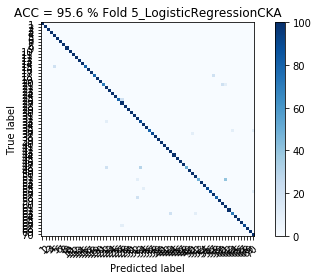

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        10
           5       0.83      1.00      0.91        10
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00        10
          10       1.00      1.00      1.00        10
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00        10
          14       1.00      1.00      1.00        10
          15       1.00      0.80      0.89        10
          16       1.00      1.00      1.00        10
          17       1.00      1.00      1.00        10
          18       1.00    

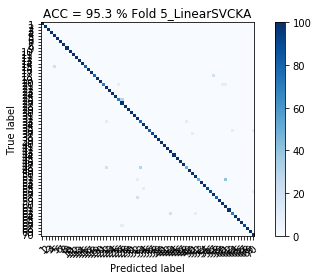

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        10
           5       0.83      1.00      0.91        10
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00        10
          10       1.00      1.00      1.00        10
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00        10
          14       1.00      1.00      1.00        10
          15       1.00      0.80      0.89        10
          16       1.00      1.00      1.00        10
          17       1.00      1.00      1.00        10
          18       1.00    

5it [18:38, 223.20s/it]

Iteration =  6/10
Linear Model
it:1/50---cost:-2.12e+00--- elapsed:5.06 [s]



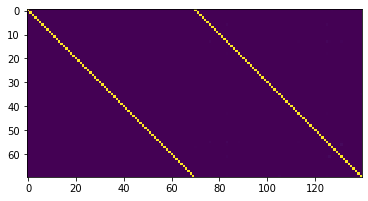

Logistic Regression Model
it:1/50---cost:-2.12e+00--- elapsed:5.12 [s]



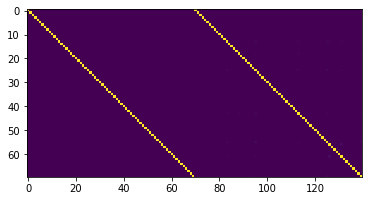

Linear SVM Model
it:1/50---cost:-2.12e+00--- elapsed:5.30 [s]



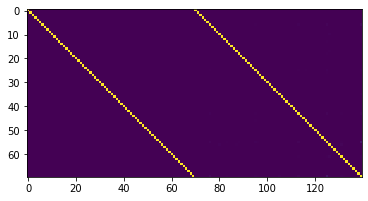

Guardando... LinearCKA_Fold6


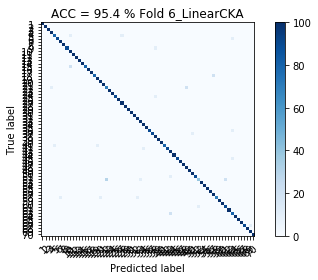

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       0.91      1.00      0.95        10
           5       0.89      0.80      0.84        10
           6       1.00      0.90      0.95        10
           7       0.91      1.00      0.95        10
           8       1.00      1.00      1.00        10
           9       1.00      0.90      0.95        10
          10       0.77      1.00      0.87        10
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00        10
          14       1.00      1.00      1.00        10
          15       1.00      0.80      0.89        10
          16       1.00      1.00      1.00        10
          17       1.00      1.00      1.00        10
          18       1.00    

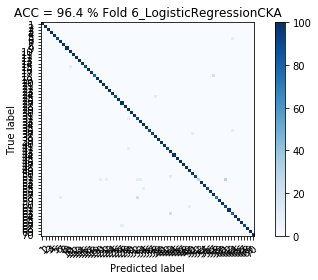

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00        10
           6       1.00      0.90      0.95        10
           7       0.91      1.00      0.95        10
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00        10
          10       0.91      1.00      0.95        10
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00        10
          14       1.00      1.00      1.00        10
          15       1.00      0.90      0.95        10
          16       1.00      1.00      1.00        10
          17       1.00      1.00      1.00        10
          18       1.00    

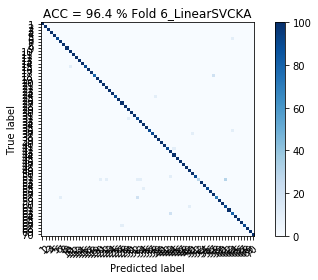

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00        10
           6       1.00      0.90      0.95        10
           7       0.91      1.00      0.95        10
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00        10
          10       0.91      1.00      0.95        10
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00        10
          14       1.00      1.00      1.00        10
          15       1.00      0.90      0.95        10
          16       1.00      1.00      1.00        10
          17       1.00      1.00      1.00        10
          18       1.00    

6it [21:56, 215.71s/it]

Iteration =  7/10
Linear Model
it:1/50---cost:-2.12e+00--- elapsed:5.01 [s]



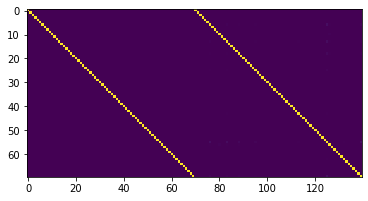

Logistic Regression Model
it:1/50---cost:-2.12e+00--- elapsed:5.65 [s]



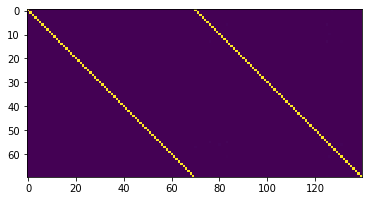

Linear SVM Model
it:1/50---cost:-2.12e+00--- elapsed:5.69 [s]



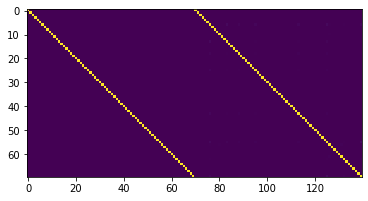

Guardando... LinearCKA_Fold7


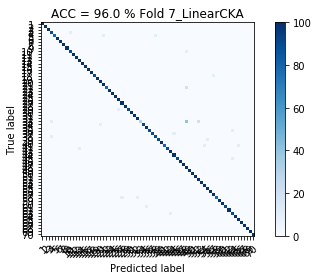

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       0.82      0.90      0.86        10
           5       1.00      0.80      0.89        10
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00        10
          10       0.90      0.90      0.90        10
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00        10
          13       0.91      1.00      0.95        10
          14       1.00      1.00      1.00        10
          15       1.00      1.00      1.00        10
          16       1.00      1.00      1.00        10
          17       1.00      1.00      1.00        10
          18       1.00    

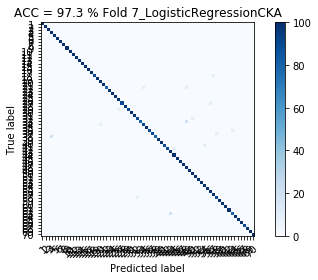

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       0.83      1.00      0.91        10
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00        10
          10       1.00      1.00      1.00        10
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00        10
          14       1.00      1.00      1.00        10
          15       1.00      1.00      1.00        10
          16       1.00      1.00      1.00        10
          17       1.00      1.00      1.00        10
          18       1.00    

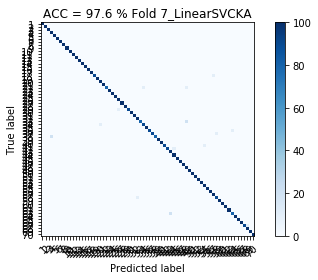

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       0.83      1.00      0.91        10
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00        10
          10       1.00      1.00      1.00        10
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00        10
          14       1.00      1.00      1.00        10
          15       1.00      1.00      1.00        10
          16       1.00      1.00      1.00        10
          17       1.00      1.00      1.00        10
          18       1.00    

7it [25:25, 213.68s/it]

Iteration =  8/10
Linear Model
it:1/50---cost:-2.12e+00--- elapsed:5.58 [s]



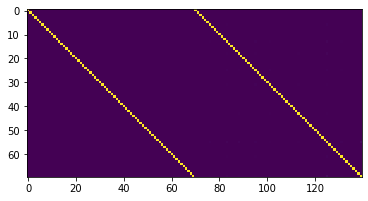

Logistic Regression Model
it:1/50---cost:-2.12e+00--- elapsed:5.31 [s]



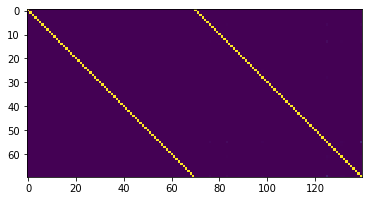

Linear SVM Model
it:1/50---cost:-2.12e+00--- elapsed:5.64 [s]



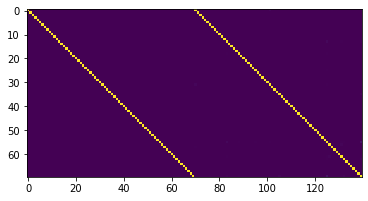

Guardando... LinearCKA_Fold8


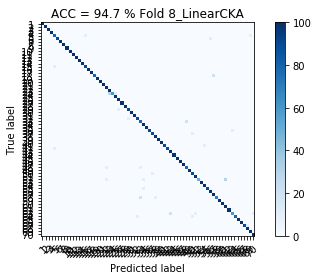

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        10
           5       0.80      0.80      0.80        10
           6       1.00      0.90      0.95        10
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00        10
          10       1.00      1.00      1.00        10
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00        10
          14       1.00      1.00      1.00        10
          15       0.90      0.90      0.90        10
          16       1.00      1.00      1.00        10
          17       1.00      1.00      1.00        10
          18       1.00    

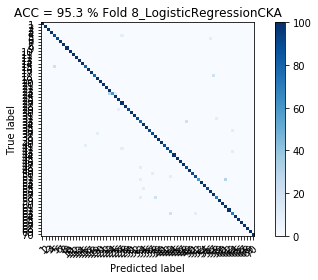

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        10
           5       0.82      0.90      0.86        10
           6       1.00      0.90      0.95        10
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00        10
          10       1.00      1.00      1.00        10
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00        10
          14       1.00      1.00      1.00        10
          15       0.89      0.80      0.84        10
          16       1.00      1.00      1.00        10
          17       1.00      1.00      1.00        10
          18       1.00    

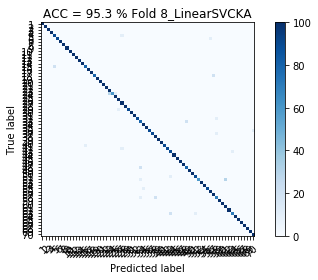

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        10
           5       0.82      0.90      0.86        10
           6       1.00      0.90      0.95        10
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00        10
          10       1.00      1.00      1.00        10
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00        10
          14       1.00      1.00      1.00        10
          15       0.89      0.80      0.84        10
          16       1.00      1.00      1.00        10
          17       1.00      1.00      1.00        10
          18       1.00    

8it [28:52, 211.76s/it]

Iteration =  9/10
Linear Model
it:1/50---cost:-2.12e+00--- elapsed:4.95 [s]



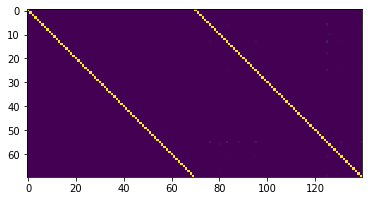

Logistic Regression Model
it:1/50---cost:-2.12e+00--- elapsed:5.76 [s]



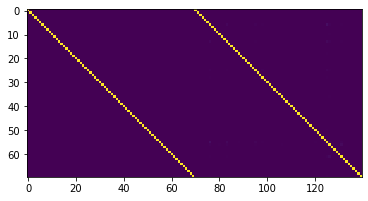

Linear SVM Model
it:1/50---cost:-2.12e+00--- elapsed:5.76 [s]



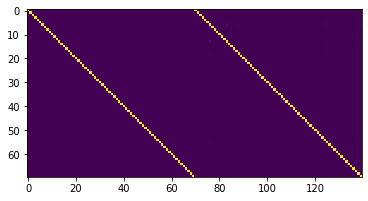

Guardando... LinearCKA_Fold9


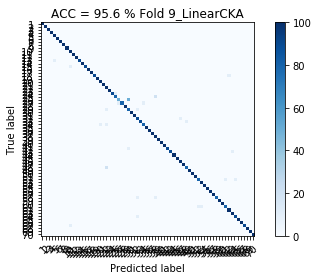

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        10
           5       0.91      1.00      0.95        10
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00        10
          10       0.83      1.00      0.91        10
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00        10
          13       1.00      0.90      0.95        10
          14       1.00      1.00      1.00        10
          15       1.00      0.90      0.95        10
          16       1.00      1.00      1.00        10
          17       1.00      1.00      1.00        10
          18       1.00    

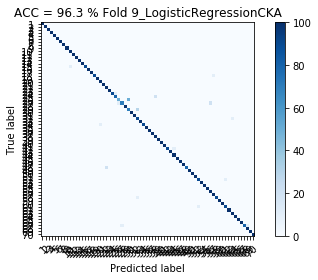

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00        10
          10       0.91      1.00      0.95        10
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00        10
          14       1.00      1.00      1.00        10
          15       1.00      0.90      0.95        10
          16       1.00      1.00      1.00        10
          17       1.00      1.00      1.00        10
          18       1.00    

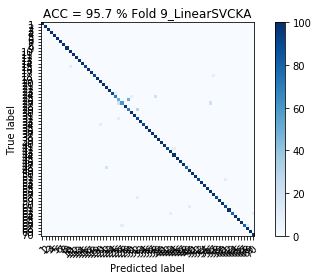

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00        10
          10       0.91      1.00      0.95        10
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00        10
          14       1.00      1.00      1.00        10
          15       1.00      0.90      0.95        10
          16       1.00      1.00      1.00        10
          17       1.00      1.00      1.00        10
          18       1.00    

9it [32:34, 214.69s/it]

Iteration =  10/10
Linear Model
it:1/50---cost:-2.12e+00--- elapsed:5.63 [s]



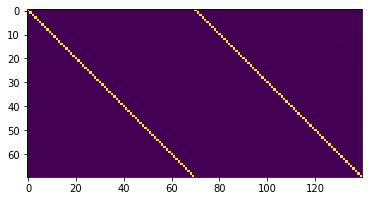

Logistic Regression Model
it:1/50---cost:-2.12e+00--- elapsed:5.33 [s]



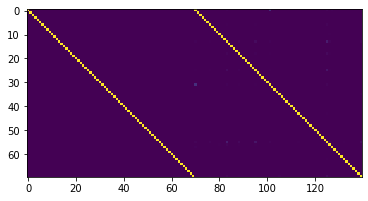

Linear SVM Model
it:1/50---cost:-2.12e+00--- elapsed:5.52 [s]



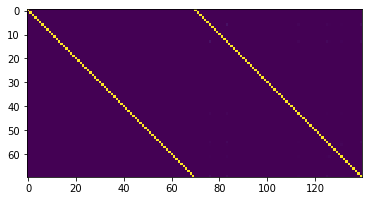

Guardando... LinearCKA_Fold10


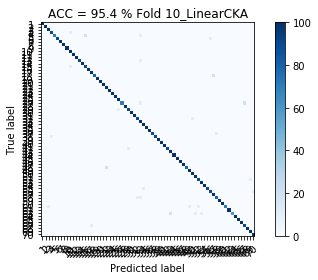

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       0.91      1.00      0.95        10
           4       0.90      0.90      0.90        10
           5       1.00      0.70      0.82        10
           6       1.00      0.90      0.95        10
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00        10
          10       0.83      1.00      0.91        10
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00        10
          13       1.00      0.90      0.95        10
          14       1.00      1.00      1.00        10
          15       0.82      0.90      0.86        10
          16       1.00      1.00      1.00        10
          17       0.91      1.00      0.95        10
          18       1.00    

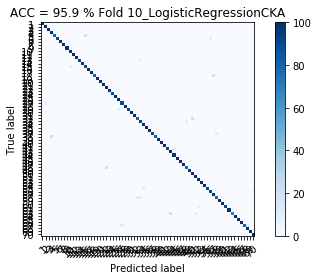

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       0.91      1.00      0.95        10
           3       1.00      1.00      1.00        10
           4       0.83      1.00      0.91        10
           5       1.00      0.80      0.89        10
           6       1.00      0.90      0.95        10
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00        10
          10       0.91      1.00      0.95        10
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00        10
          13       1.00      0.90      0.95        10
          14       1.00      1.00      1.00        10
          15       0.82      0.90      0.86        10
          16       1.00      1.00      1.00        10
          17       1.00      1.00      1.00        10
          18       1.00    

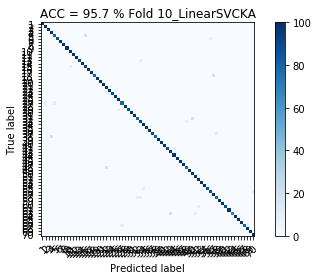

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       0.91      1.00      0.95        10
           3       1.00      1.00      1.00        10
           4       0.83      1.00      0.91        10
           5       0.89      0.80      0.84        10
           6       1.00      0.90      0.95        10
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00        10
          10       0.91      1.00      0.95        10
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00        10
          13       1.00      0.90      0.95        10
          14       1.00      1.00      1.00        10
          15       0.82      0.90      0.86        10
          16       1.00      1.00      1.00        10
          17       1.00      1.00      1.00        10
          18       1.00    

10it [36:04, 216.49s/it]


In [ ]:
# Traininig/Testing loop
fold = 0

for train_index, test_index in tqdm(sss.split(X,y)):
    # Training/testing index storage
    train_idx += [train_index]
    test_idx  += [test_index]
    
    # Number of partitions flag
    fold = fold + 1
    print("Iteration = ", str(fold) +'/'+ str(n_partitions))
    
    # Iteration file name 
    filename = img_path + "/Fold" + str(fold)

    # Train/Test partition and matrix storing to apply CKA over them for 
    # visualization
    X_train, X_test = X[train_index,:], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    X_train_cka = X_train
    X_test_cka  = X_test
    y_train_cka = y_train
    y_test_cka  = y_test

    # ---------------------------------------------------------------------------------------------------------------------------
    # Training
    
    # Linear
    print('Linear Model')
    # Using GridSearchCV 
    # hs_Lineal = GridSearchCV(Pipeline(steps[0]), parameters[0], n_jobs = 6, cv = 5, scoring = 'balanced_accuracy', verbose = 50)
    # Using RandomizedSearchCV
    hs_Lineal = RandomizedSearchCV(Pipeline(steps[0]), param_distributions=parameters[0],n_iter=10, cv=5, iid=False, n_jobs=10)
    hs_Lineal.fit(X_train,y_train)
    # Projection matrix from CKA
    W_cka_L += [hs_Lineal.best_estimator_.named_steps['Projection'].Wcka]


    # Logistic Regression
    print('Logistic Regression Model')
    # Usaing GridSearchCV 
    # hs_LogR = GridSearchCV(Pipeline(steps[1]), parameters[1], n_jobs = 6, cv = 5, scoring = 'balanced_accuracy', verbose = 50)
    # Using RandomizedSearchCV
    hs_LogR = RandomizedSearchCV(Pipeline(steps[1]), param_distributions=parameters[1],n_iter=10, cv=5, iid=False,n_jobs=10)
    hs_LogR.fit(X_train,y_train)
    # Projection matrix from CKA
    W_cka_LogR += [hs_LogR.best_estimator_.named_steps['Projection'].Wcka]
  

    # Linear SVM
    print('Linear SVM Model')
    # Using GridSearchCV 
    #hs_lSVM = GridSearchCV(Pipeline(steps[2]), parameters[2], n_jobs = 6, cv = 5, scoring = 'balanced_accuracy', verbose = 50)
    # Using RandomizedSearchCV
    hs_lSVM = RandomizedSearchCV(Pipeline(steps[2]), param_distributions=parameters[2],n_iter=10, cv=5, iid=False, n_jobs=10)  
    hs_lSVM.fit(X_train,y_train)
    # Projection matrix from CKA
    W_cka_lSVM += [hs_lSVM.best_estimator_.named_steps['Projection'].Wcka]

    # ---------------------------------------------------------------------------------------------------------------------------
    # Validation
    
    # Linear
    y_pred_L           = hs_Lineal.best_estimator_.predict(X_test)
    accuracy_L[fold-1] = accuracy_score(y_test,y_pred_L)
    cm_temp            = confusion_matrix(y_test,y_pred_L)
    cm_L[fold-1,:,:]   = 100*cm_temp.astype('float') / cm_temp.sum(axis=1)[:, np.newaxis]
    plot_confusion_matrix(y_test, y_pred_L, classes=np.unique(y),normalize=True,title='ACC = %.1f %% Fold %d' % (100*accuracy_L[fold-1],fold) + '_'+ label_models[0])
    plt.autoscale()
    save_fig(img_path,label_models[0]+'_Fold'+str(fold))                      
    plt.show()
    cr_L += [classification_report(y_test,y_pred_L)]
    print(cr_L[-1])
    # Best model storage
    # best_mod_L += [hs_Lineal.best_estimator_, accuracy_L,cm_L,cr_L, sel_fts_L]
    # best_mod_L += [hs_Lineal.best_estimator_]
    best_pms_L += [hs_Lineal.best_params_]
    joblib.dump(best_pms_L, filename + "LinealCKA" + ".pkl")


    # Logistic Regression
    y_pred_LogR          = hs_LogR.best_estimator_.predict(X_test)
    accuracy_LogR[fold-1]= accuracy_score(y_test,y_pred_LogR)
    cm_temp              = confusion_matrix(y_test,y_pred_LogR)
    cm_LogR[fold-1,:,:]  = 100*cm_temp.astype('float') / cm_temp.sum(axis=1)[:, np.newaxis]
    plot_confusion_matrix(y_test, y_pred_LogR, classes=np.unique(y),normalize=True,title='ACC = %.1f %% Fold %d' % (100*accuracy_LogR[fold-1],fold) + '_'+ label_models[1])
    plt.autoscale()
    save_fig(img_path,label_models[1]+'_Fold'+str(fold))                      
    plt.show()
    cr_LogR += [classification_report(y_test,y_pred_LogR)]
    print(cr_LogR[-1])
    # Best model storage
    # best_mod_LogR += [hs_LogR.best_estimator_, accuracy_LogR,cm_LogR,cr_LogR, sel_fts_LogR]
    # best_mod_LogR += [hs_LogR.best_estimator_]
    best_pms_LogR += [hs_LogR.best_params_]
    joblib.dump(best_pms_LogR, filename + "LogRCKA" + ".pkl")


    # Linear SVM
    y_pred_lSVM          = hs_lSVM.best_estimator_.predict(X_test)
    accuracy_lSVM[fold-1]= accuracy_score(y_test,y_pred_lSVM)
    cm_temp              = confusion_matrix(y_test,y_pred_lSVM)
    cm_LogR[fold-1,:,:]  = 100*cm_temp.astype('float') / cm_temp.sum(axis=1)[:, np.newaxis]
    plot_confusion_matrix(y_test, y_pred_lSVM, classes=np.unique(y),normalize=True,title='ACC = %.1f %% Fold %d' % (100*accuracy_lSVM[fold-1],fold) + '_'+ label_models[2])
    plt.autoscale()
    save_fig(img_path,label_models[2]+'_Fold'+str(fold))                      
    plt.show()
    cr_lSVM += [classification_report(y_test,y_pred_lSVM)]
    print(cr_lSVM[-1])
    # Best model storage
    # best_mod_lSVM += [hs_lSVM.best_estimator_, accuracy_lSVM,cm_lSVM,cr_lSVM, sel_fts_lSVM]
    # best_mod_lSVM += [hs_lSVM.best_estimator_]
    best_pms_lSVM += [hs_lSVM.best_params_]
    joblib.dump(best_pms_lSVM, filename + "lSVMCKA" + ".pkl")
    
    # Results dictionary creation
    L_dict = {'accuracy_L': accuracy_L,
              'cm_L': cm_L,
              'cr_L': cr_L,
              'W_cka_L': W_cka_L,
              'X_train_cka': X_train_cka,
              'X_test_cka': X_test_cka,
              'y_train_cka':y_train_cka,
              'y_test_cka':y_test_cka}

    LogR_dict = {'accuracy_LogR': accuracy_LogR,
                'cm_LogR': cm_LogR,
                'cr_LogR': cr_LogR,
                'W_cka_LogR': W_cka_LogR,
                'X_train_cka': X_train_cka,
                'X_test_cka': X_test_cka,
                'y_train_cka':y_train_cka,
                'y_test_cka':y_test_cka}

    lSVM_dict = {'accuracy_lSVM': accuracy_lSVM,
                'cm_lSVM': cm_lSVM,
                'cr_lSVM': cr_lSVM,
                'W_cka_lSVM': W_cka_lSVM,
                'X_train_cka': X_train_cka,
                'X_test_cka': X_test_cka,
                'y_train_cka':y_train_cka,
                'y_test_cka':y_test_cka}

    Results = [L_dict, LogR_dict, lSVM_dict]
    
    joblib.dump(Results, rslt_dir + ".pkl")

Average result printing

In [ ]:
print('Linear Classifier')
print(str(np.mean(np.array(Results[0]['accuracy_L']))*100) + '+/-' + str(np.std(np.array(Results[0]['accuracy_L']))*100))

print('Logistic Regression Classifier')
print(str(np.mean(np.array(Results[1]['accuracy_LogR']))*100) + '+/-' + str(np.std(np.array(Results[1]['accuracy_LogR']))*100))

print('Linear SVM Classifier')
print(str(np.mean(np.array(Results[2]['accuracy_lSVM']))*100) + '+/-' + str(np.std(np.array(Results[2]['accuracy_lSVM']))*100))

Linear Classifier
95.61428571428571+/-0.4867635724971661
Logistic Regression Classifier
96.45714285714287+/-0.7306692487168249
Linear SVM Classifier
96.27142857142857+/-0.7888250109873436


Projection matrix plotting

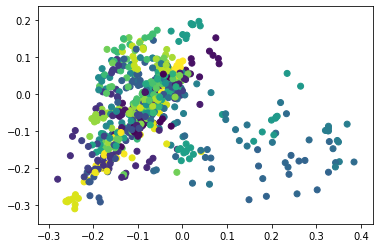

In [ ]:
W    = Results[1]['W_cka_LogR'][0]
Xp   = X_train_cka.dot(W)
# Plotting the projection matrix
plt.scatter(Xp[:,1],Xp[:,2],c = y_train_cka)